In this notebook we have visiualized dynamics of Covid Cases accross all county. Our main motive was to answer following questions:
1. How the dynamics of the pandemic have shifted over the past two years.
1. Do counties follow any trend for Covid Cases and peaks. Does any county followed the other county, was there any corrleation.
2. How was the dynamics of Covid Cases with respect to population, were cases always high in counties with higher population.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.animation as ani
from matplotlib.pyplot import figure
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
df = pd.read_parquet('../data/processed_datasets/final_dataset_v3.parquet')
df = df.filter(items=['date', 'county','daily_cases','POP2020'])
df.rename(columns={'county':'COUNTY'},inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.reset_index()
df.drop(['index'], inplace=True, axis=1)
df.head()

date   COUNTY  daily_cases  POP2020
0 2020-03-26   Albany         19.0   314848
1 2020-03-26  Suffolk        475.0  1524665
2 2020-03-26  Suffolk        475.0  1524665
3 2020-03-26  Suffolk        475.0  1524665
4 2020-03-26  Suffolk        475.0  1524665

In [3]:
df['cases_by_pop'] = df.apply(lambda x: x['daily_cases']/x['POP2020'], axis=1)
df = df.rename(columns={'cases_by_pop': 'daily_cases_by_pop'})

In [4]:
df.head()

date   COUNTY  daily_cases  POP2020  daily_cases_by_pop
0 2020-03-26   Albany         19.0   314848            0.000060
1 2020-03-26  Suffolk        475.0  1524665            0.000312
2 2020-03-26  Suffolk        475.0  1524665            0.000312
3 2020-03-26  Suffolk        475.0  1524665            0.000312
4 2020-03-26  Suffolk        475.0  1524665            0.000312

In [5]:
#!pip3 install contextily
import contextily as cx

In [6]:
street_map = gpd.read_file('../data/raw_datasets/NYS_Civil_Boundaries.shp.zip',)

In [7]:
import matplotlib.colors as colors
import mapclassify
# import geoplot
%matplotlib inline


def plot_geo_data(df, col_name, ax, fig, title="", show_base_cbar=False, show_base_map=False, cmap='Reds'):
    k = 1600  # I find that the more colors, the smoother the viz becomes as data points are spread across gradients
    cmap = cmap
    figsize = (20, 15)
    scheme = 'Quantiles'
    crs = {'init': 'epsg:4326'}

    subset = df.copy()
    subset['pop_density'] = subset['POP2020']/subset['CALC_SQ_MI']

    subset = subset.to_crs(crs)
    subset.plot(column=col_name, cmap=cmap, figsize=figsize, ax=ax,
                scheme=scheme, k=k, legend=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Adding Colorbar for legibility

    # normalize color
    vmin, vmax, vcenter = subset[col_name].min(
    ), subset[col_name].max(), subset[col_name].mean()
    divnorm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    # create a normalized colorbar
    if show_base_cbar:
        cbar = plt.cm.ScalarMappable(norm=divnorm, cmap=cmap)
        fig.colorbar(cbar, ax=ax)
    ax.set(title=title,
           ylabel="Lattitude", xlabel="Longitude")
    if show_base_map:
        cx.add_basemap(ax, crs=crs, source=cx.providers.Stamen.TonerLite)
# plt.show()


**Population Density in New York State**

/Users/vishakha/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


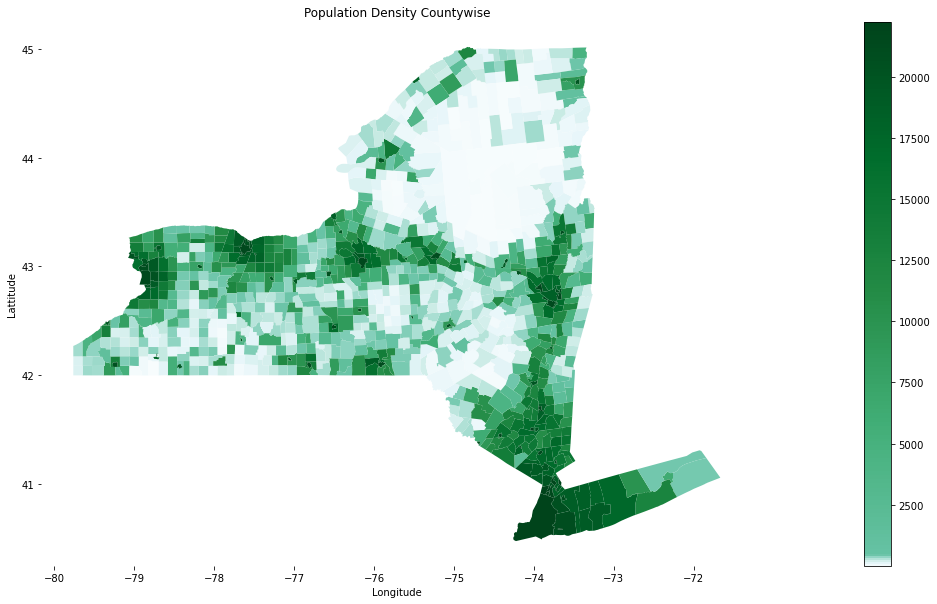

In [8]:
fig, ax = plt.subplots(figsize=(40, 10))
plot_geo_data(street_map, 'pop_density', ax=ax, fig=fig, show_base_cbar=True,cmap='BuGn',title='Population Density Countywise')


**Let us visualize the dynamics of pandemic over past years (cases) accross all the county of NY state**

Pandemic rolled accross the U.S. unevenly and in multiple waves 

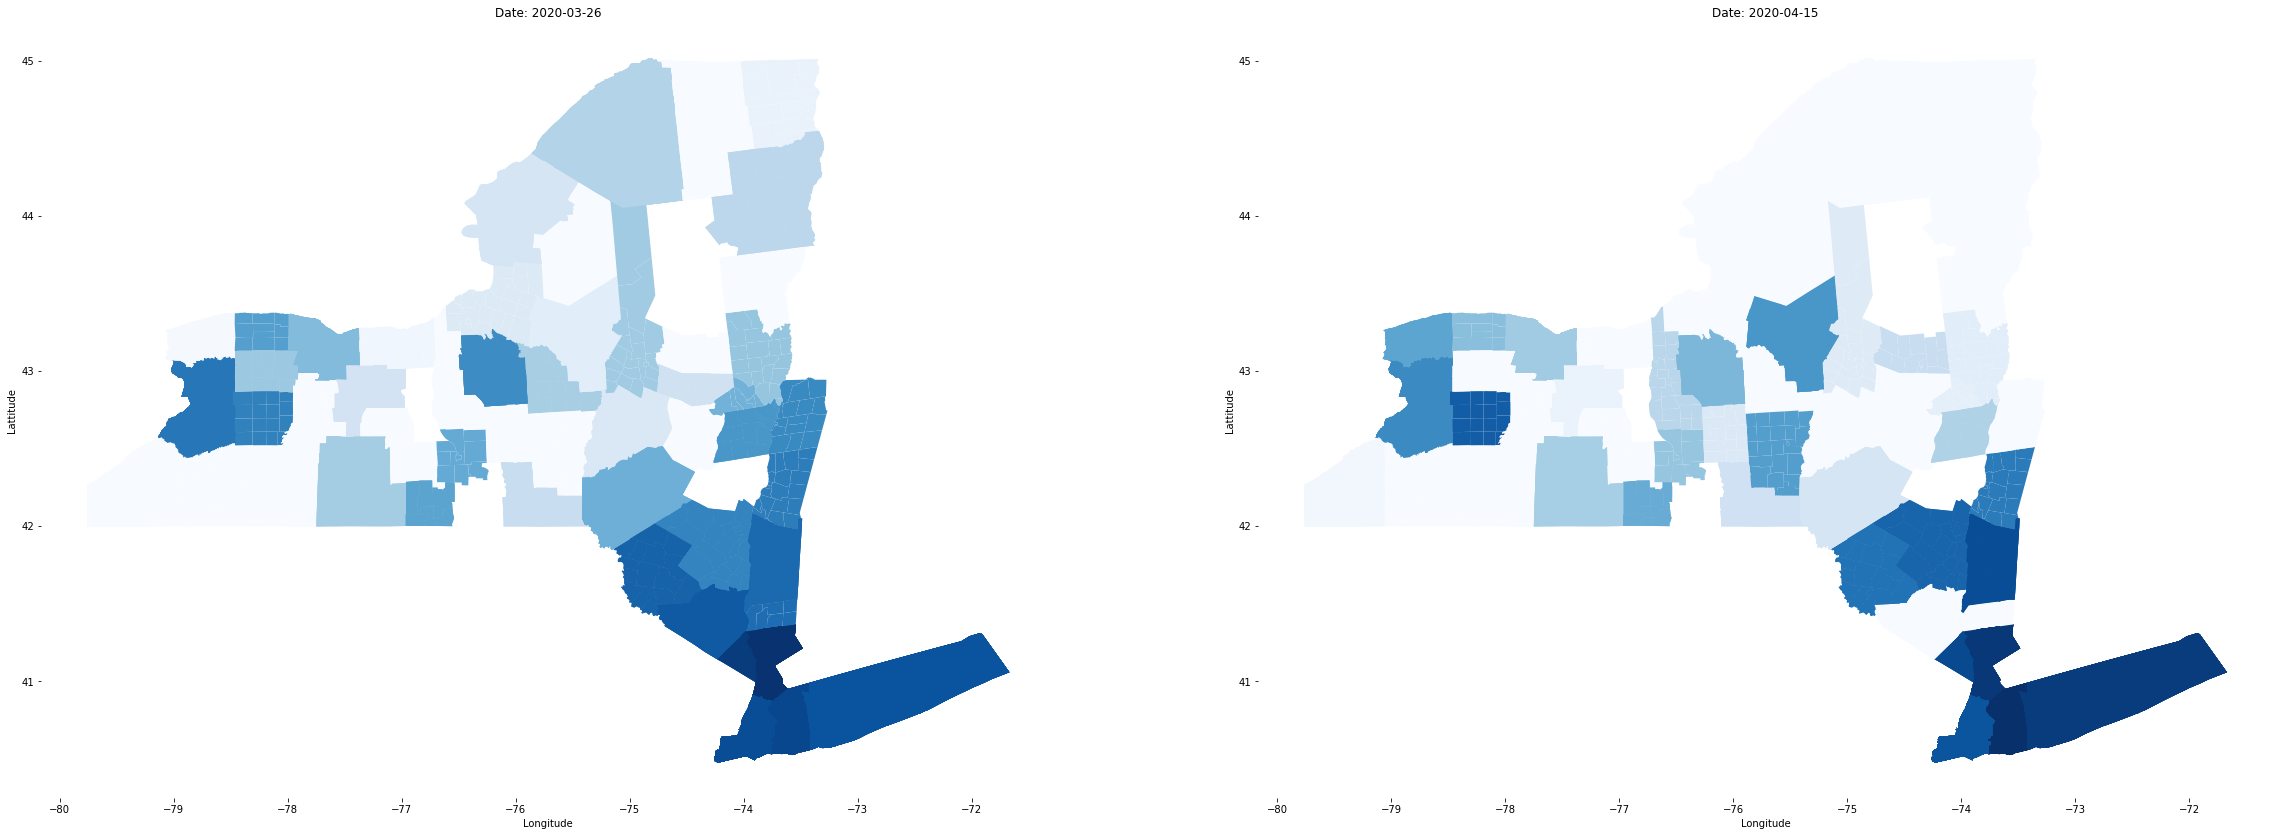

In [9]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-03-26',ax1),('2020-04-15',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

*First wave - was largely geographically concentrated and in particular the New York City region.*


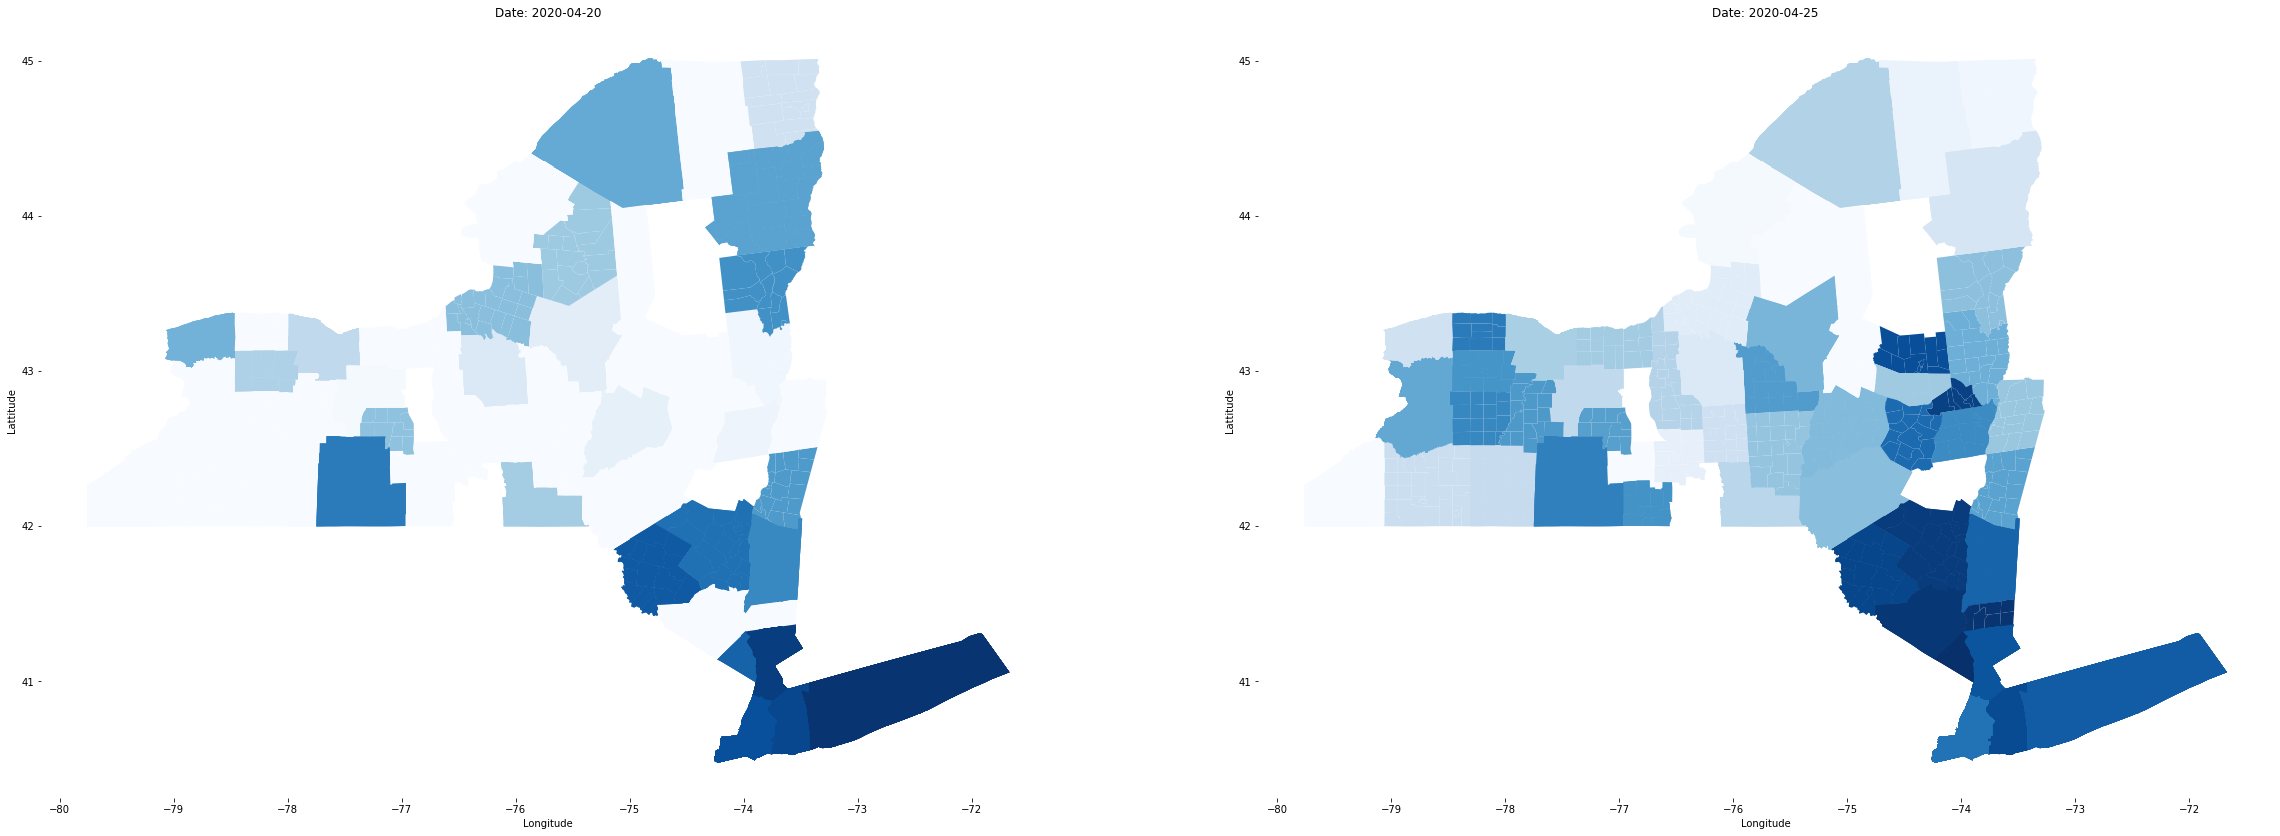

In [10]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-04-20',ax1),('2020-04-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

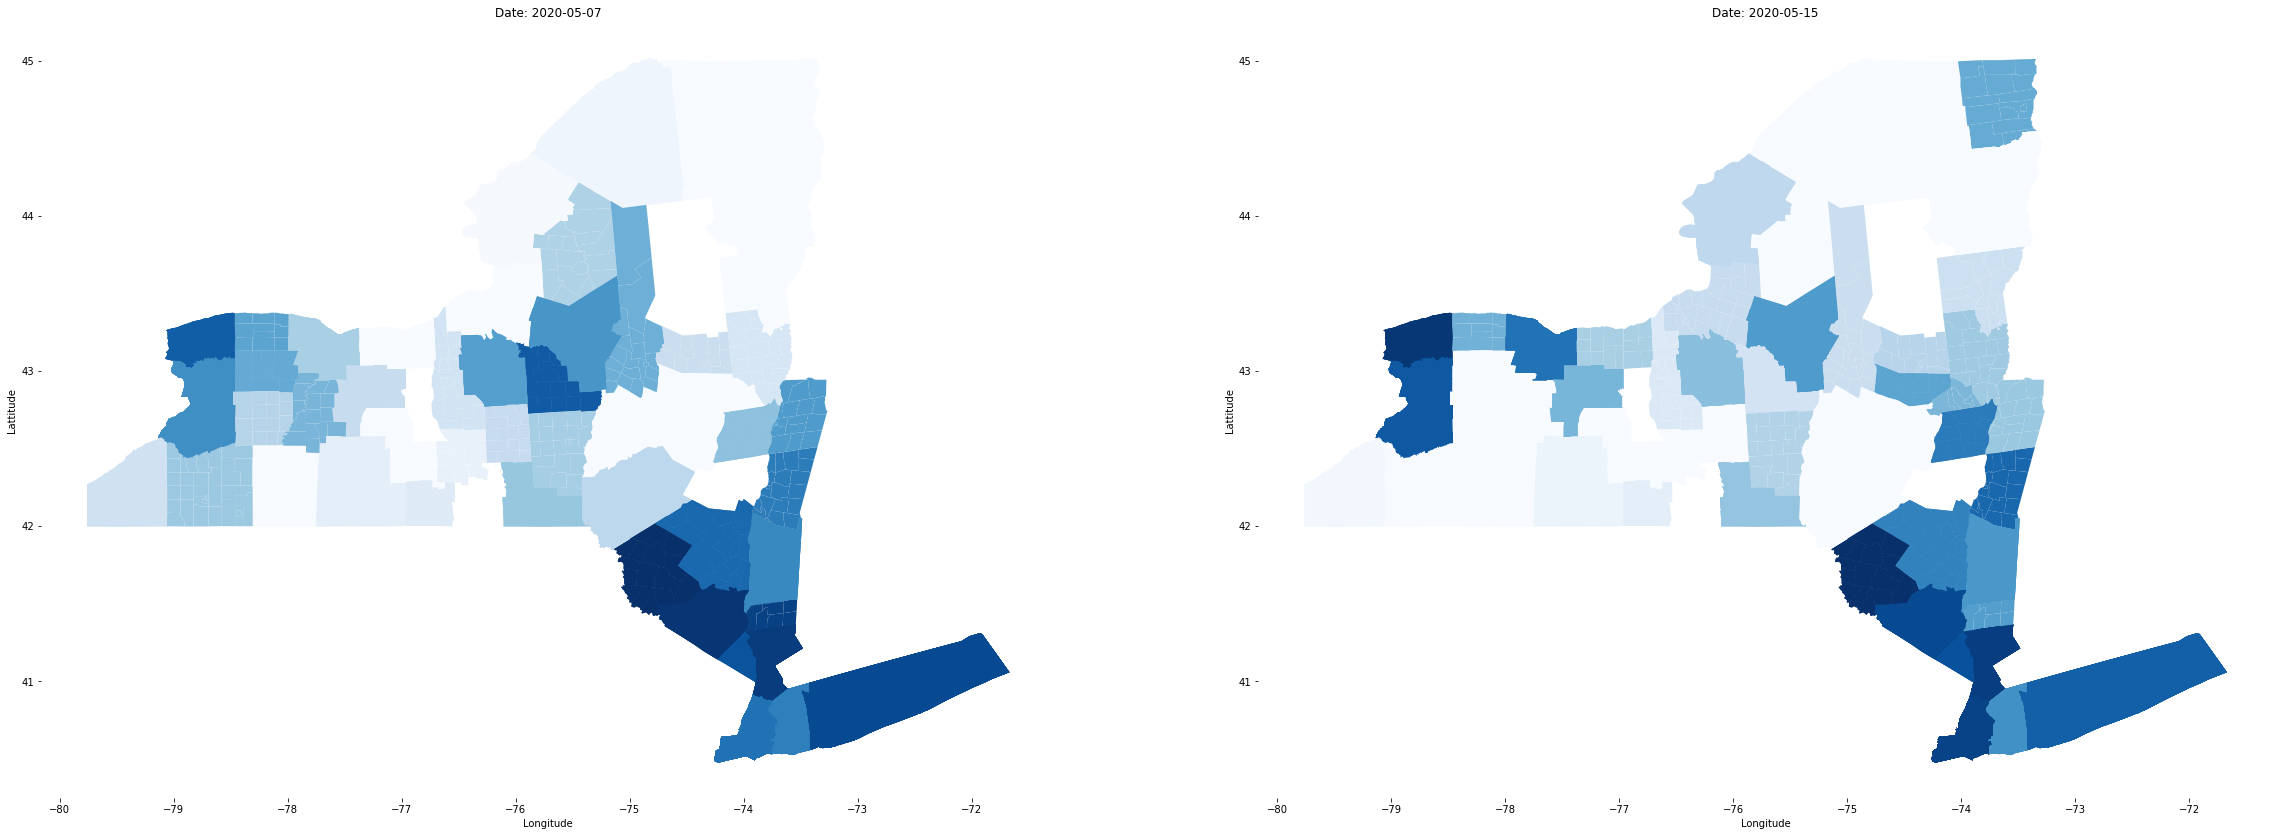

In [11]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-05-07',ax1),('2020-05-15',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

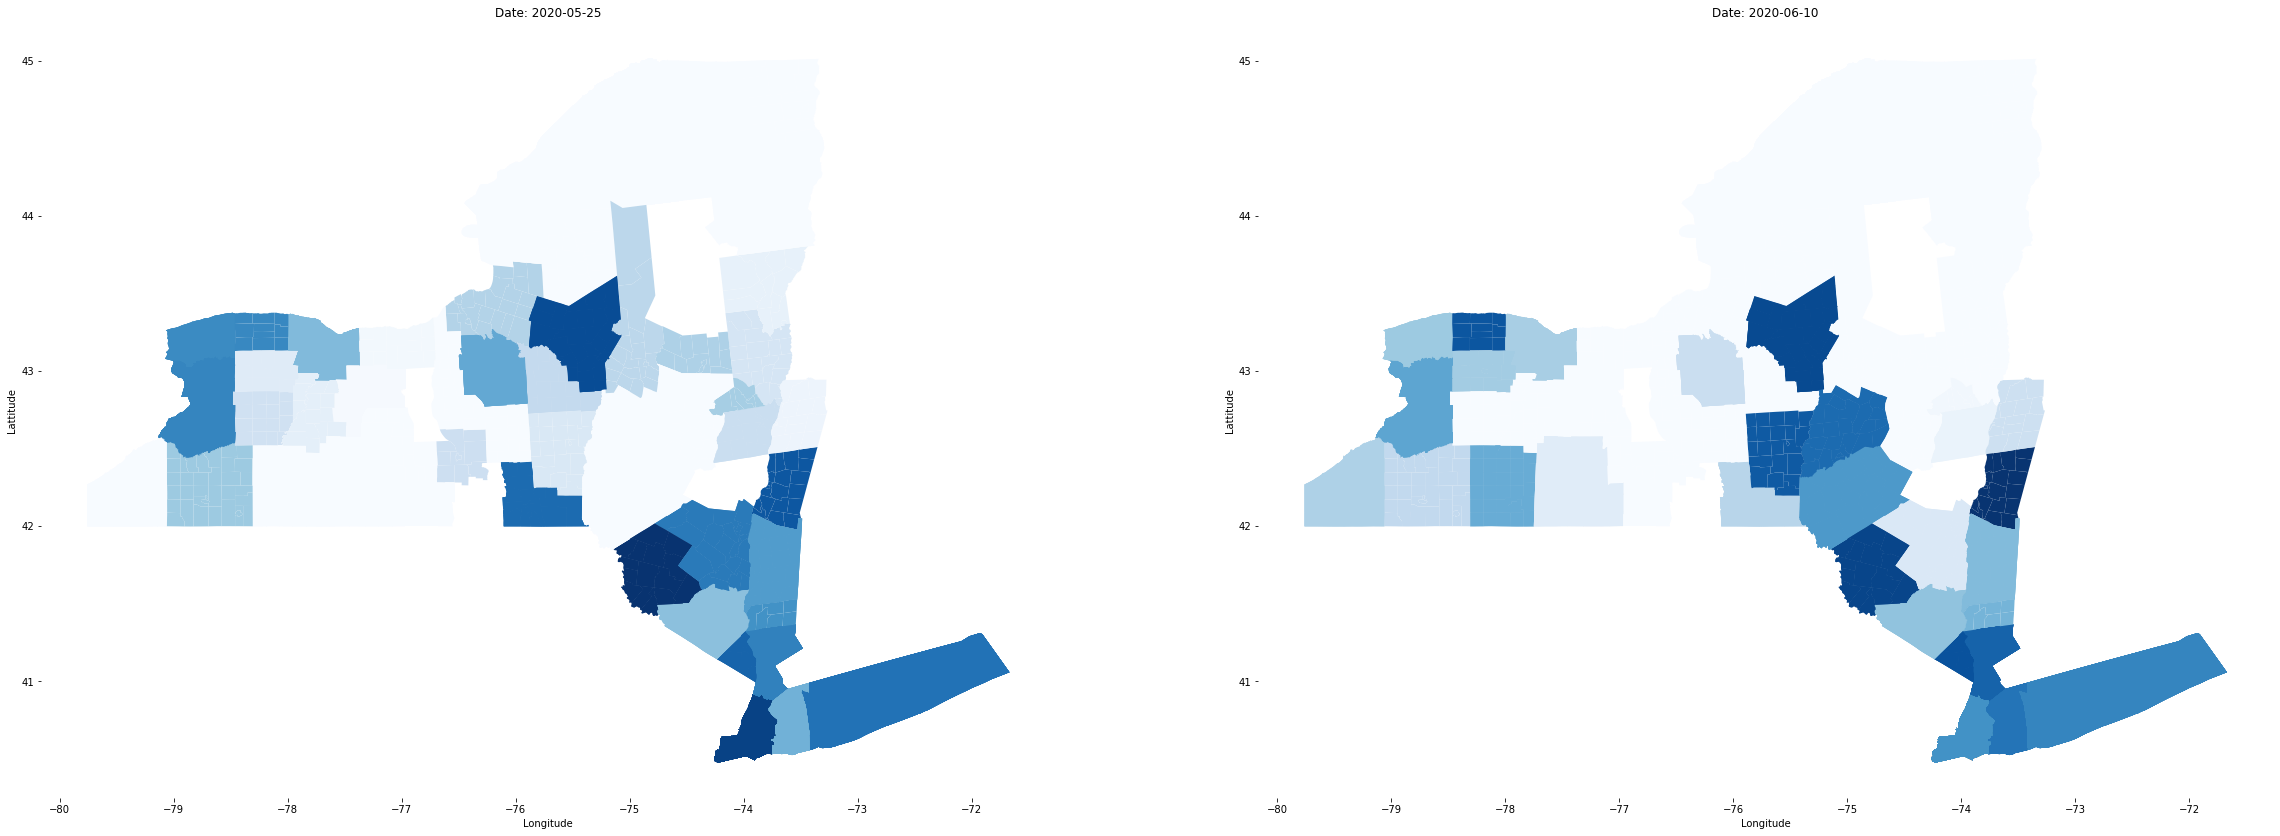

In [12]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-05-25',ax1),('2020-06-10',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

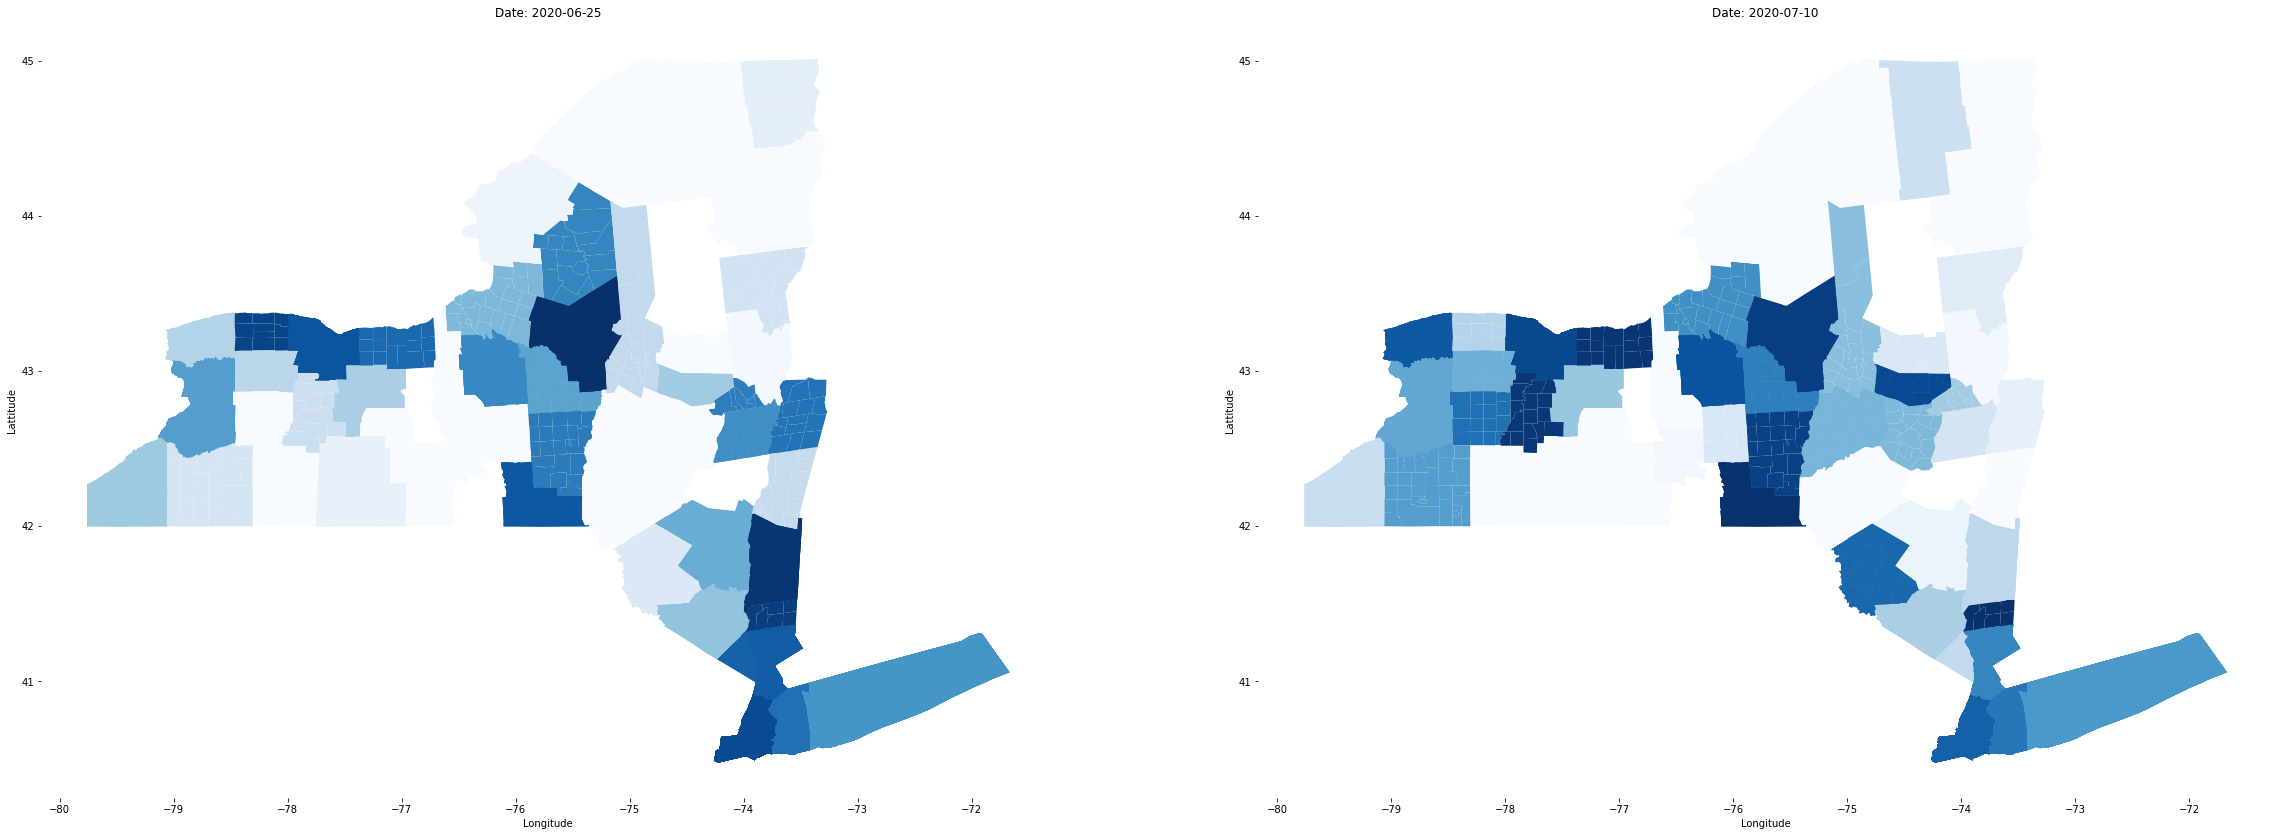

In [13]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-06-25',ax1),('2020-07-10',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

*During the summer of 2020 , second wave , cases shifted from most populated area of New York City and spreaded accorss less populated area*

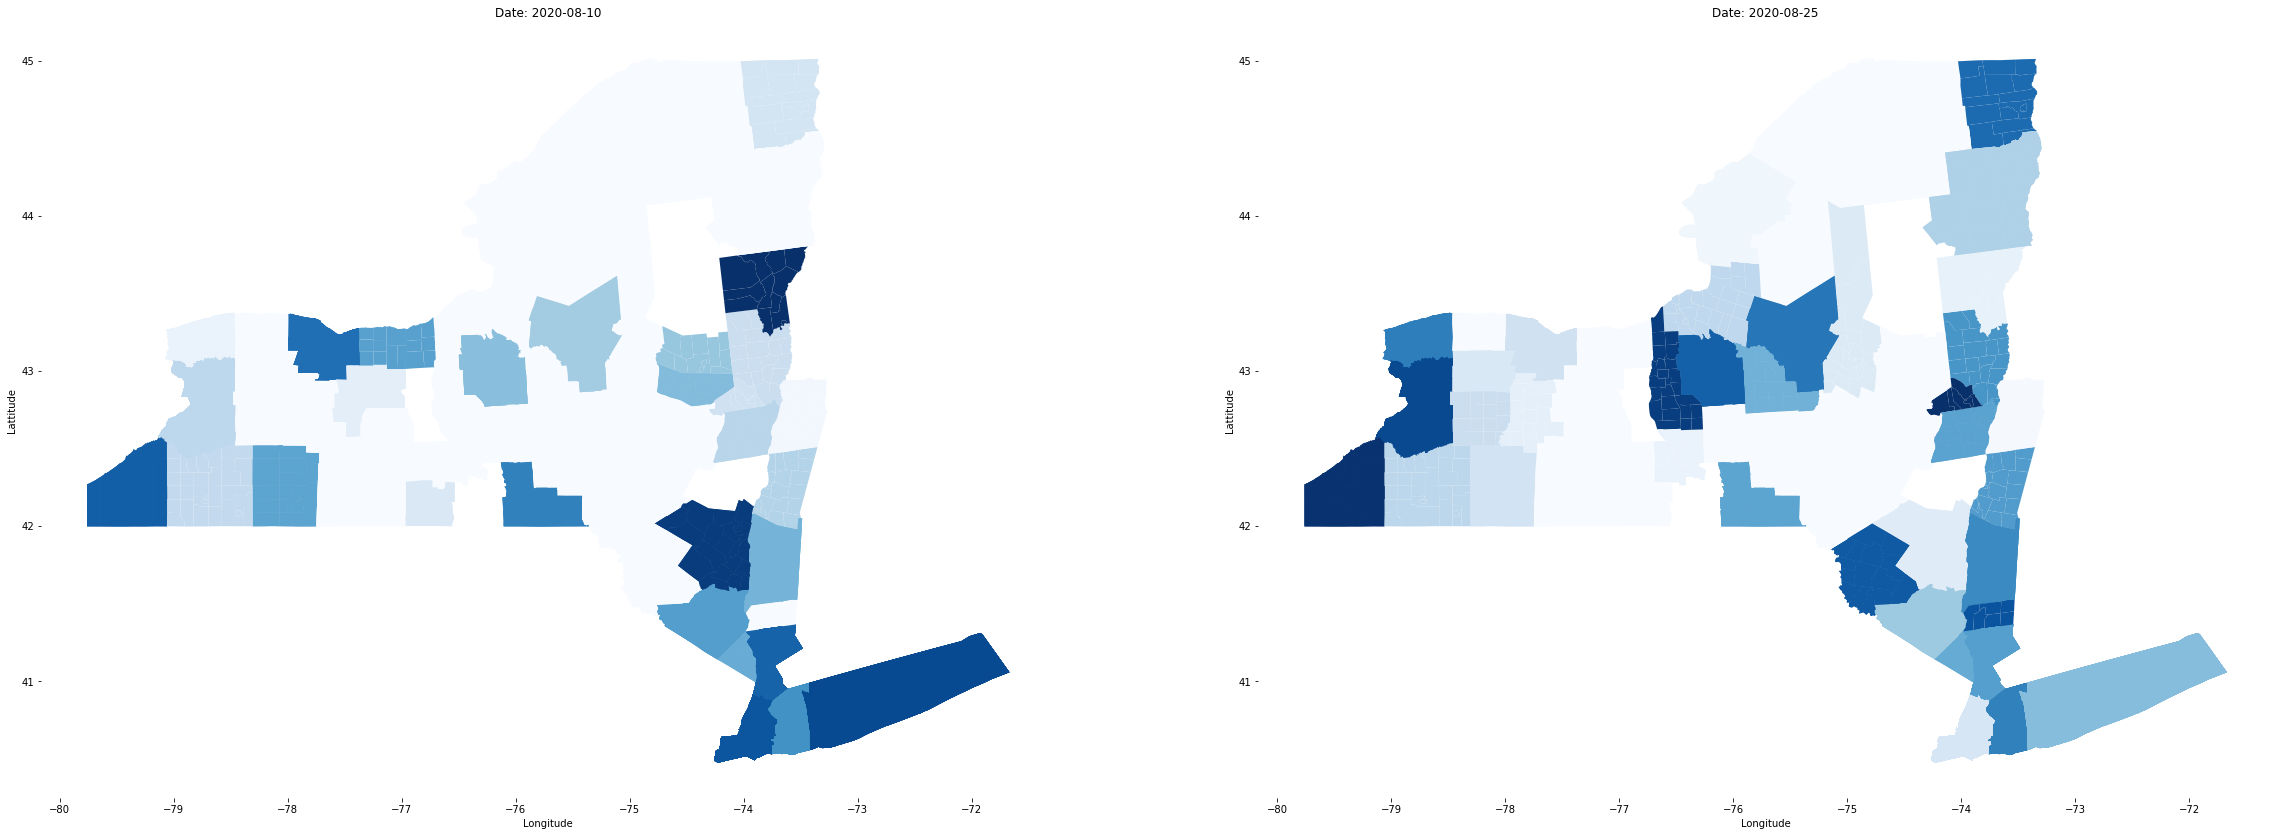

In [14]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-08-10',ax1),('2020-08-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

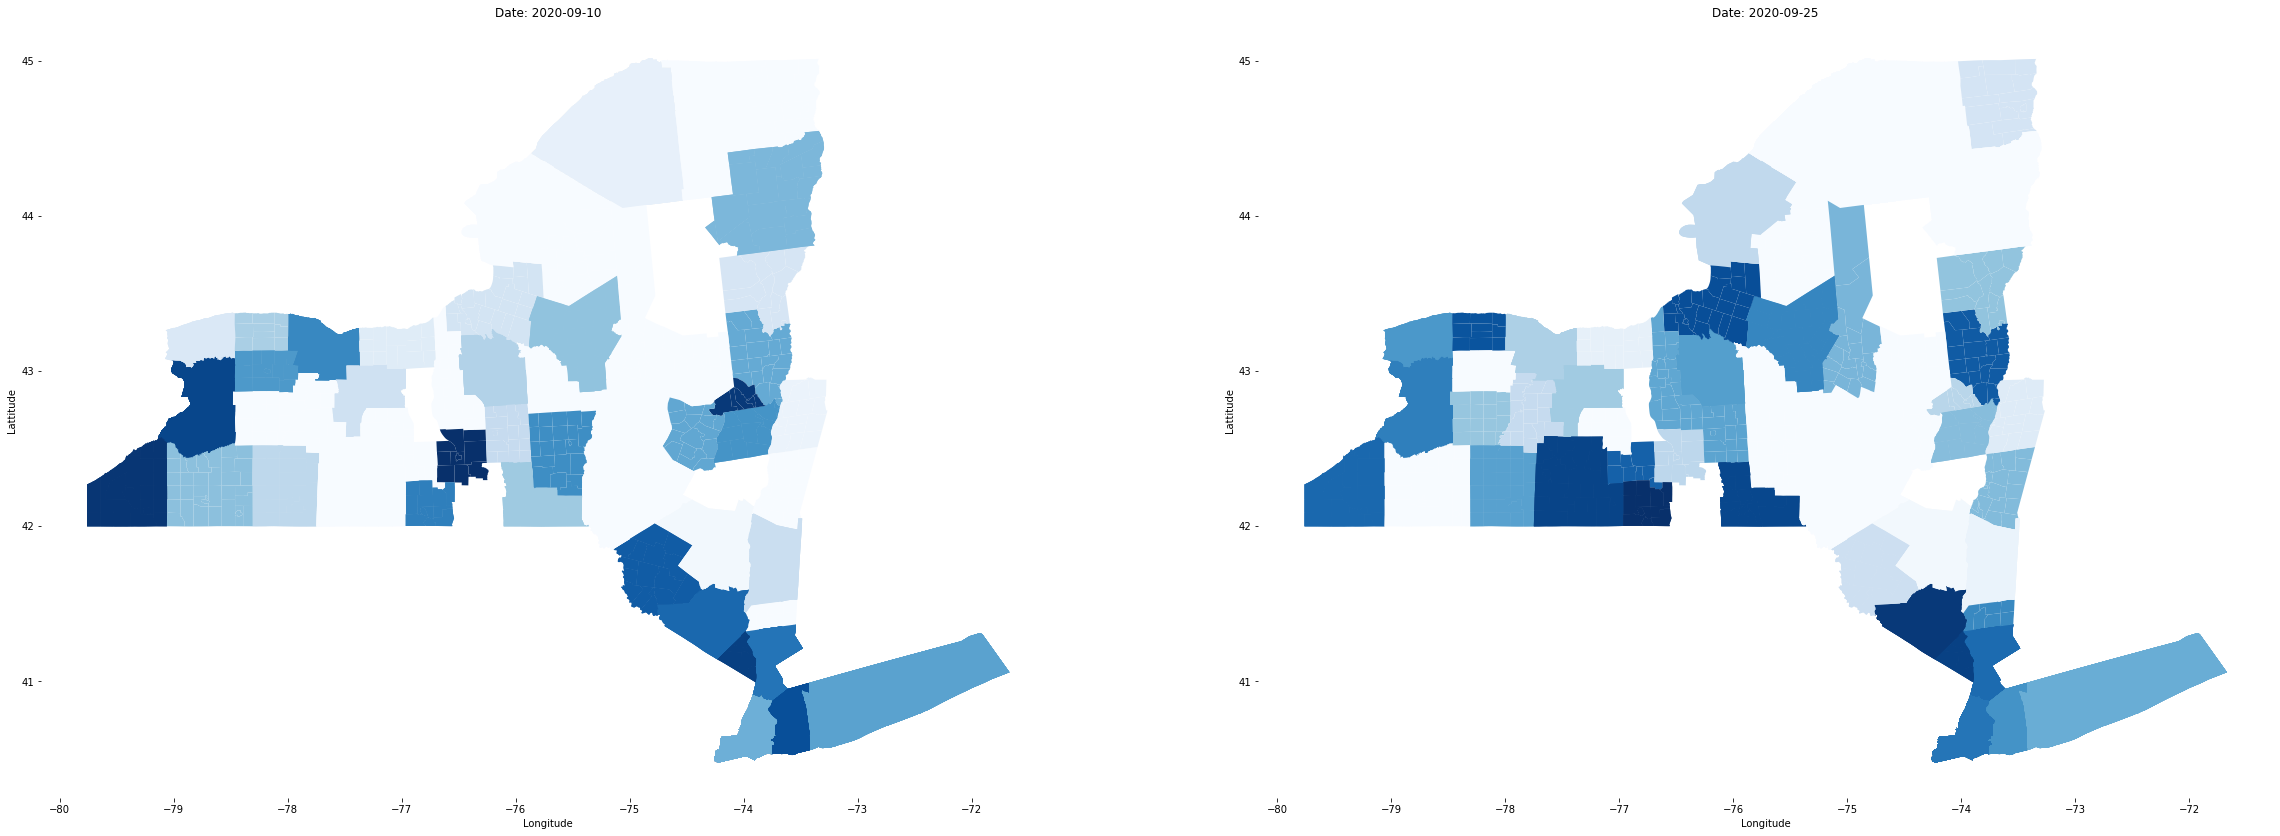

In [15]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-09-10',ax1),('2020-09-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

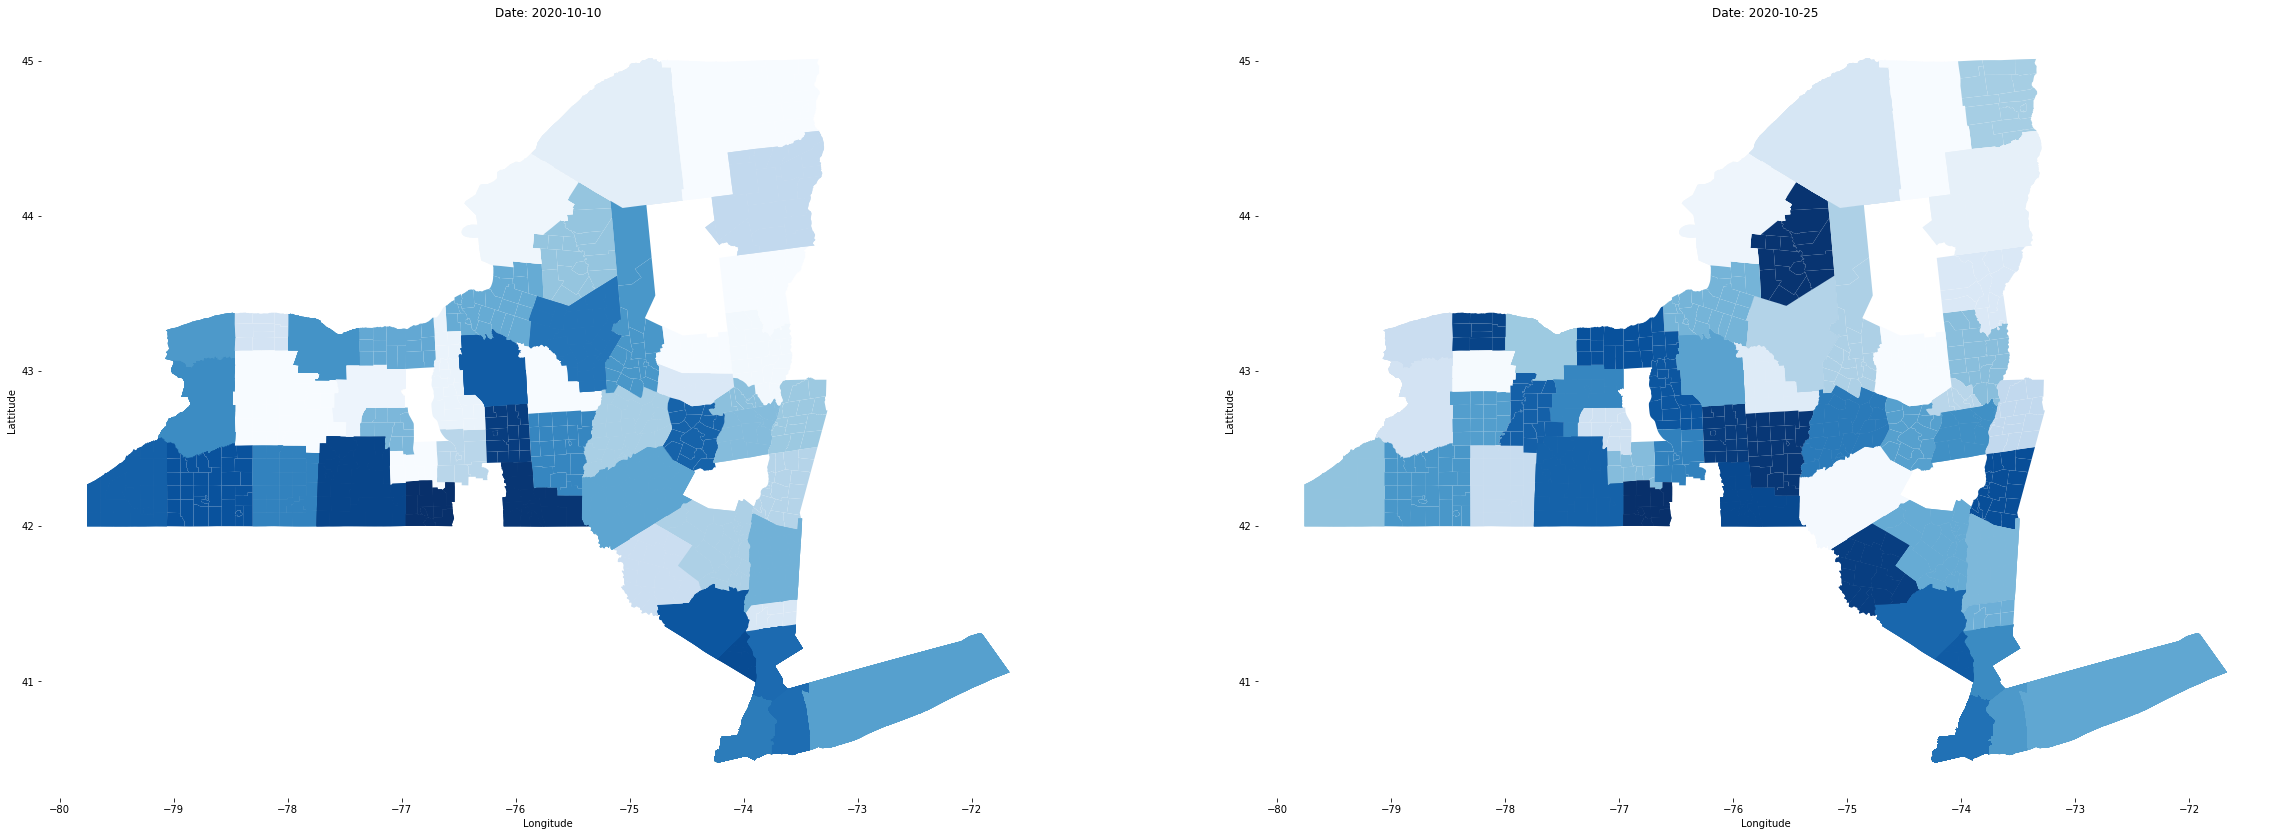

In [16]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-10-10',ax1),('2020-10-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

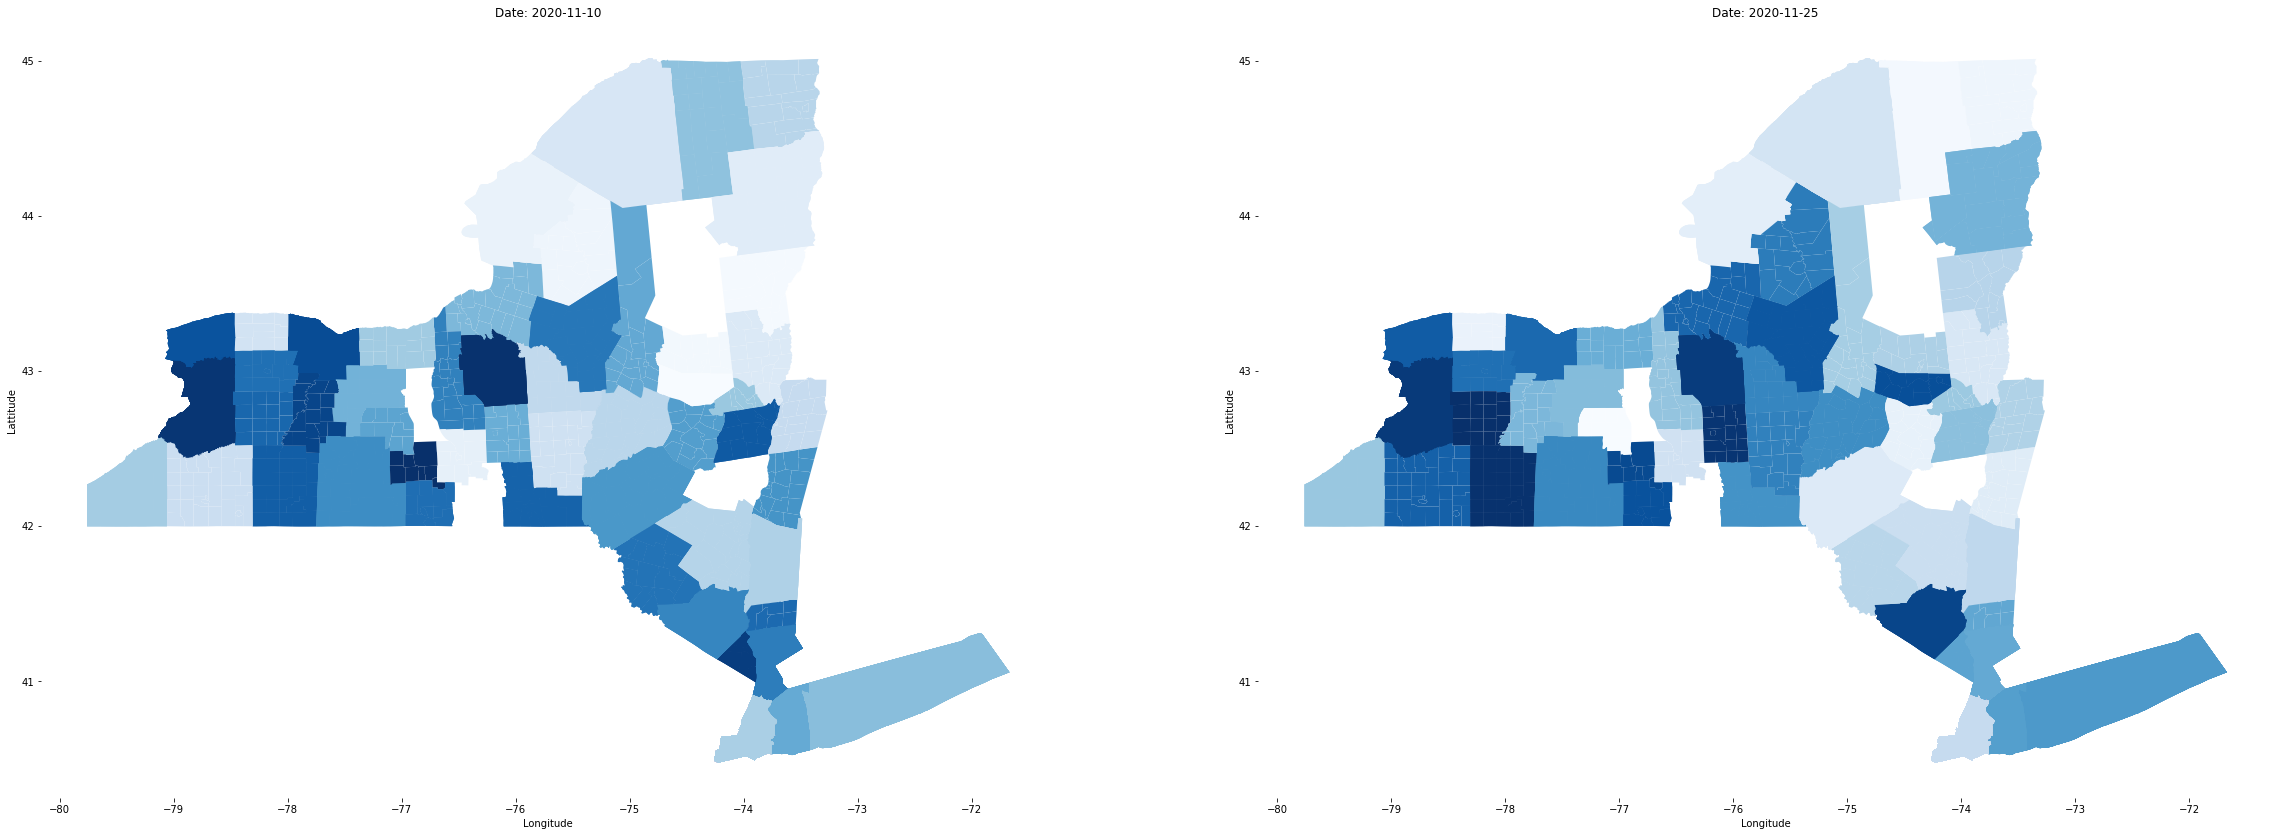

In [17]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-11-10',ax1),('2020-11-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

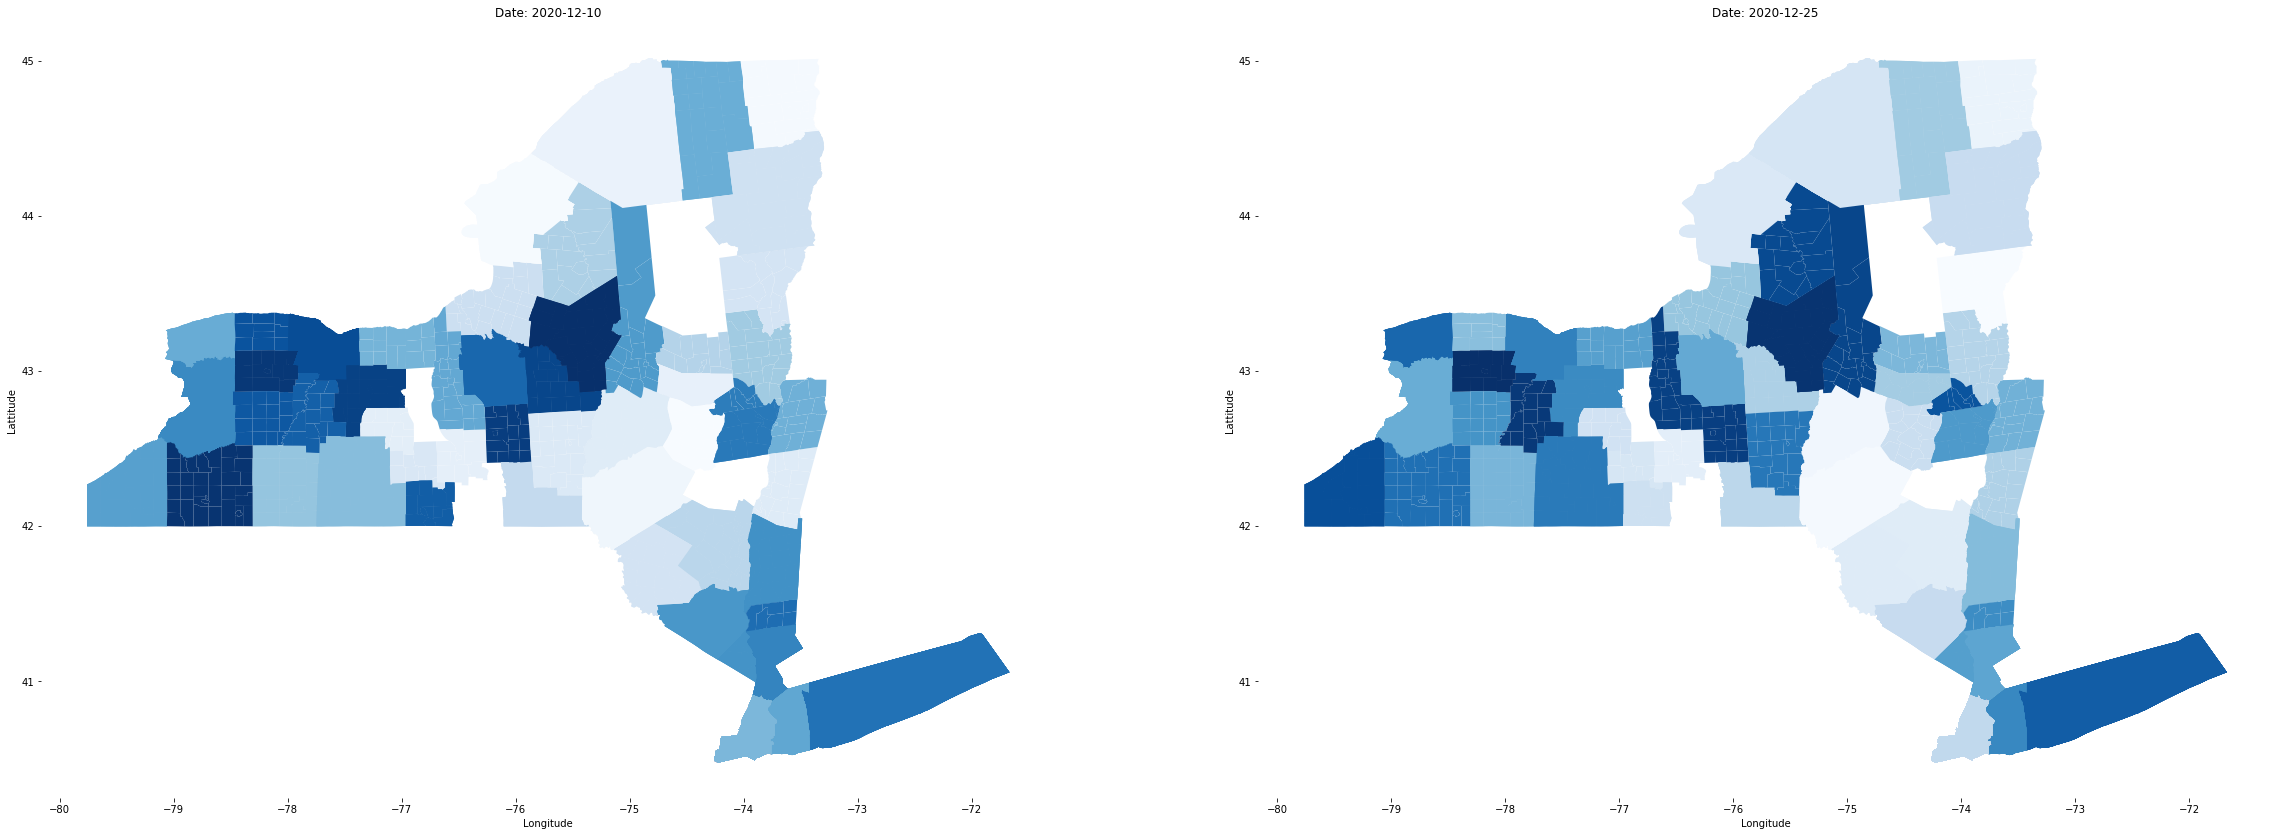

In [18]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-12-10',ax1),('2020-12-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

*The fall and winter months of 2020 and early 2021 were the deadliest of the pandemic to date.
The geographic distinctions that characterized the earlier waves became much less pronounced.*

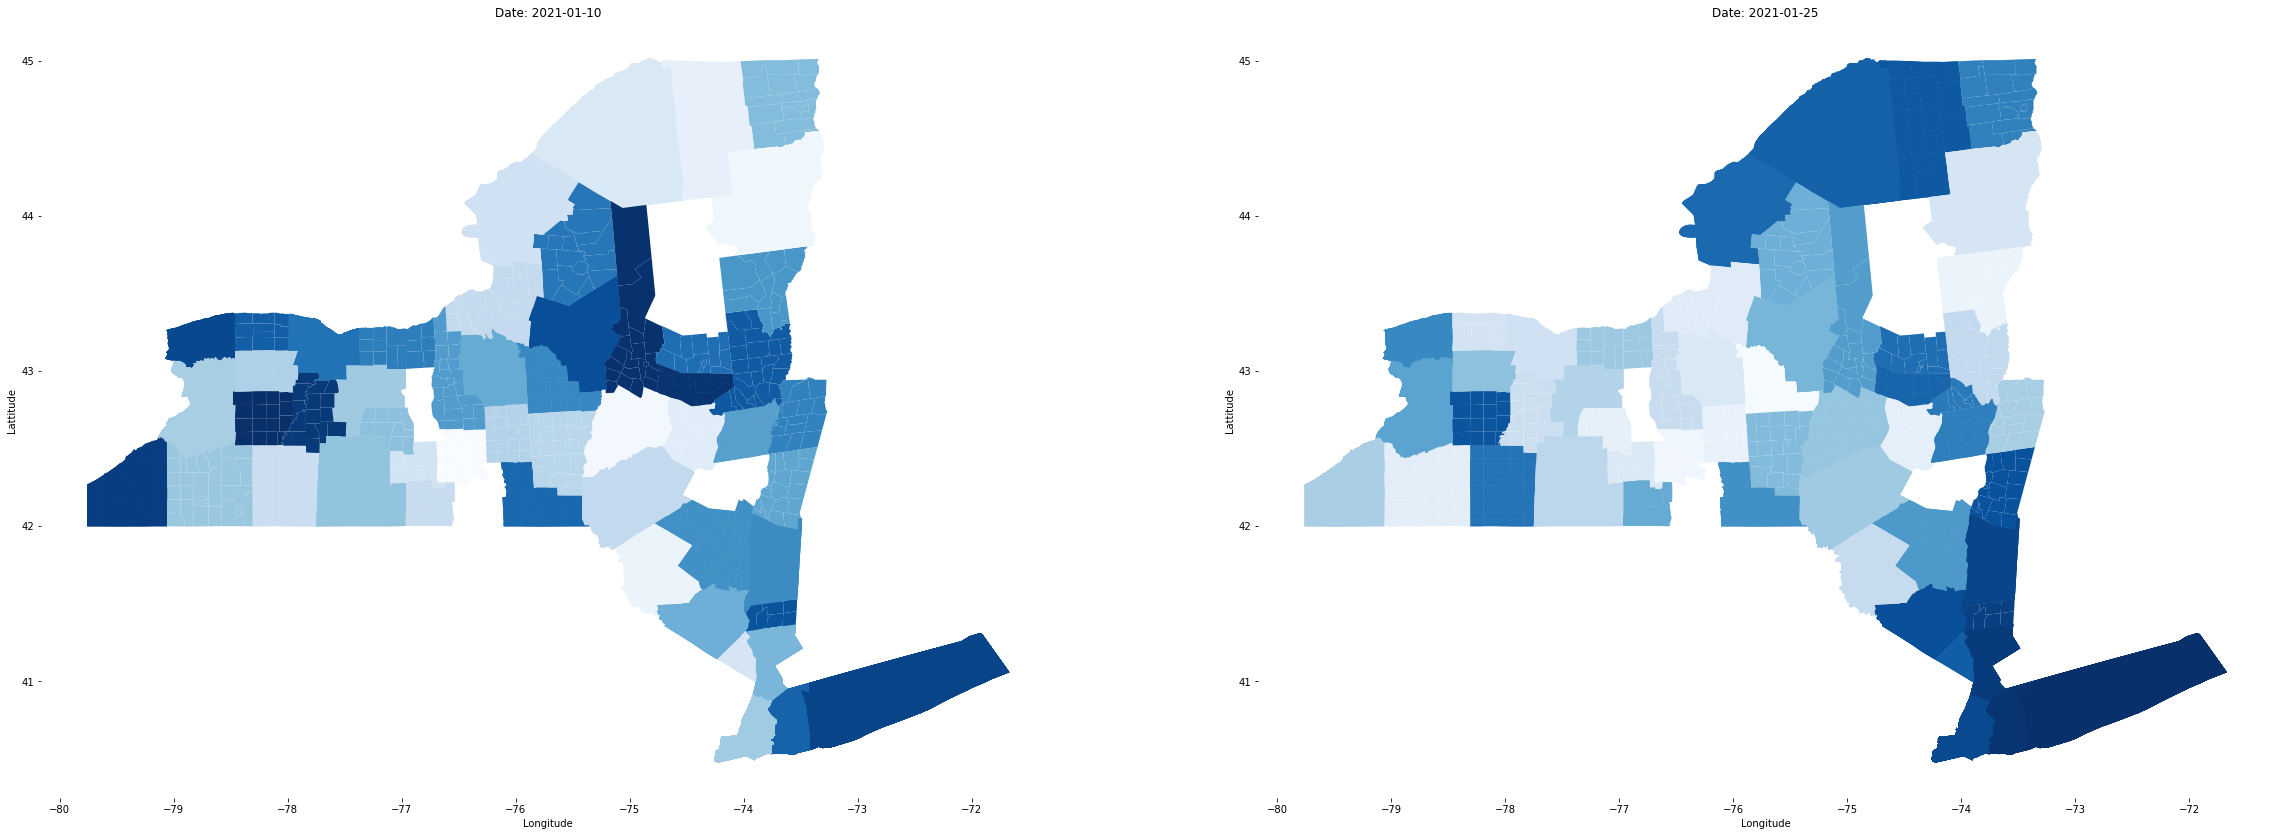

In [19]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-01-10',ax1),('2021-01-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

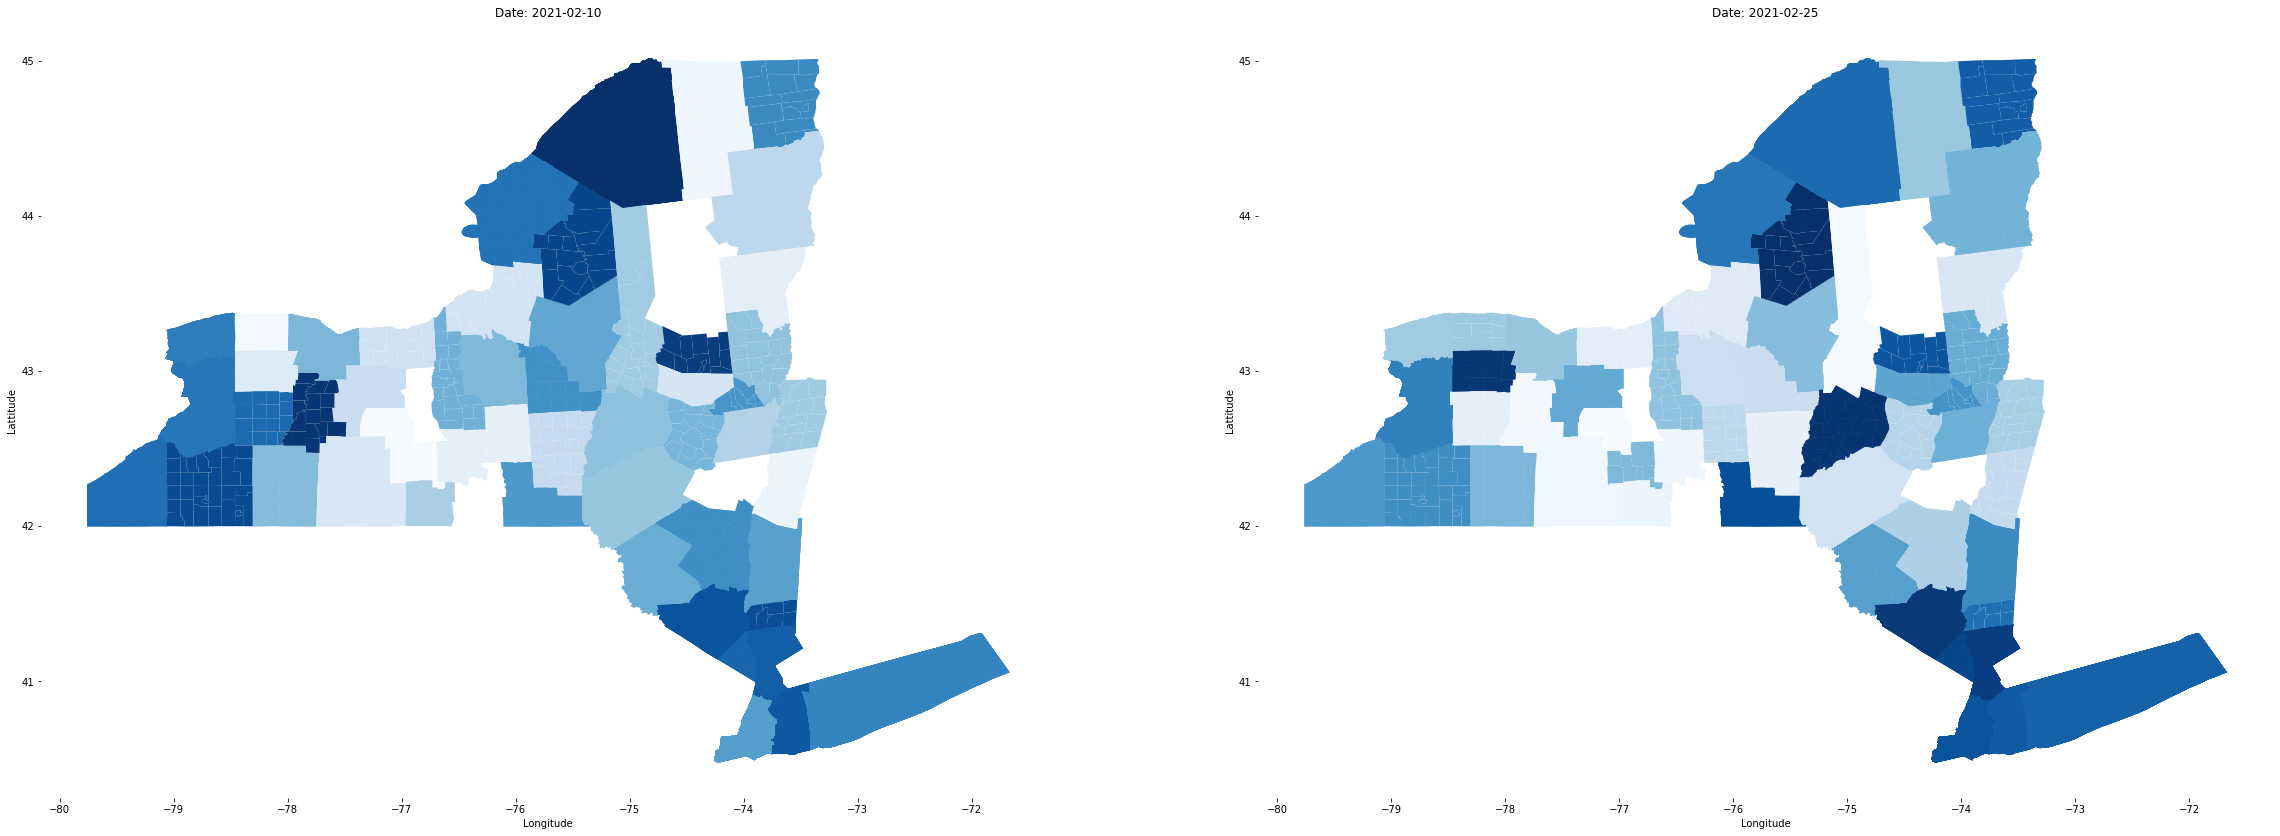

In [20]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-02-10',ax1),('2021-02-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

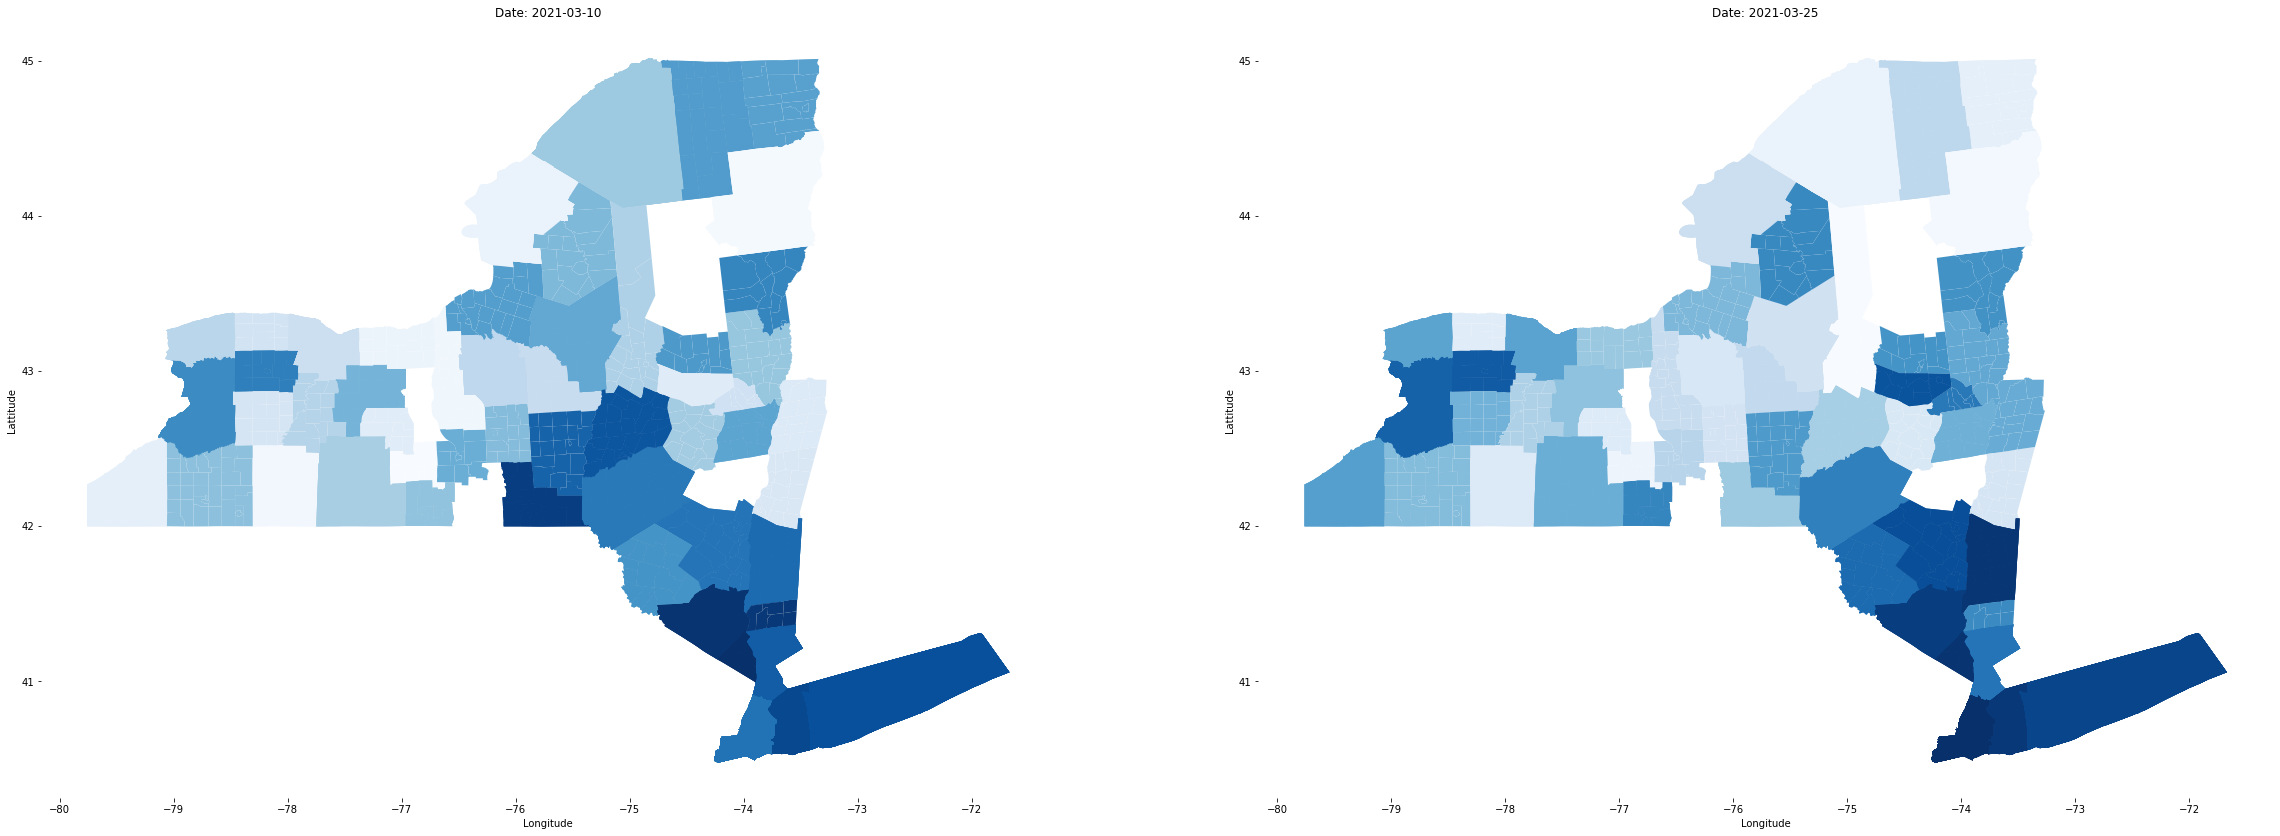

In [21]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-03-10',ax1),('2021-03-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

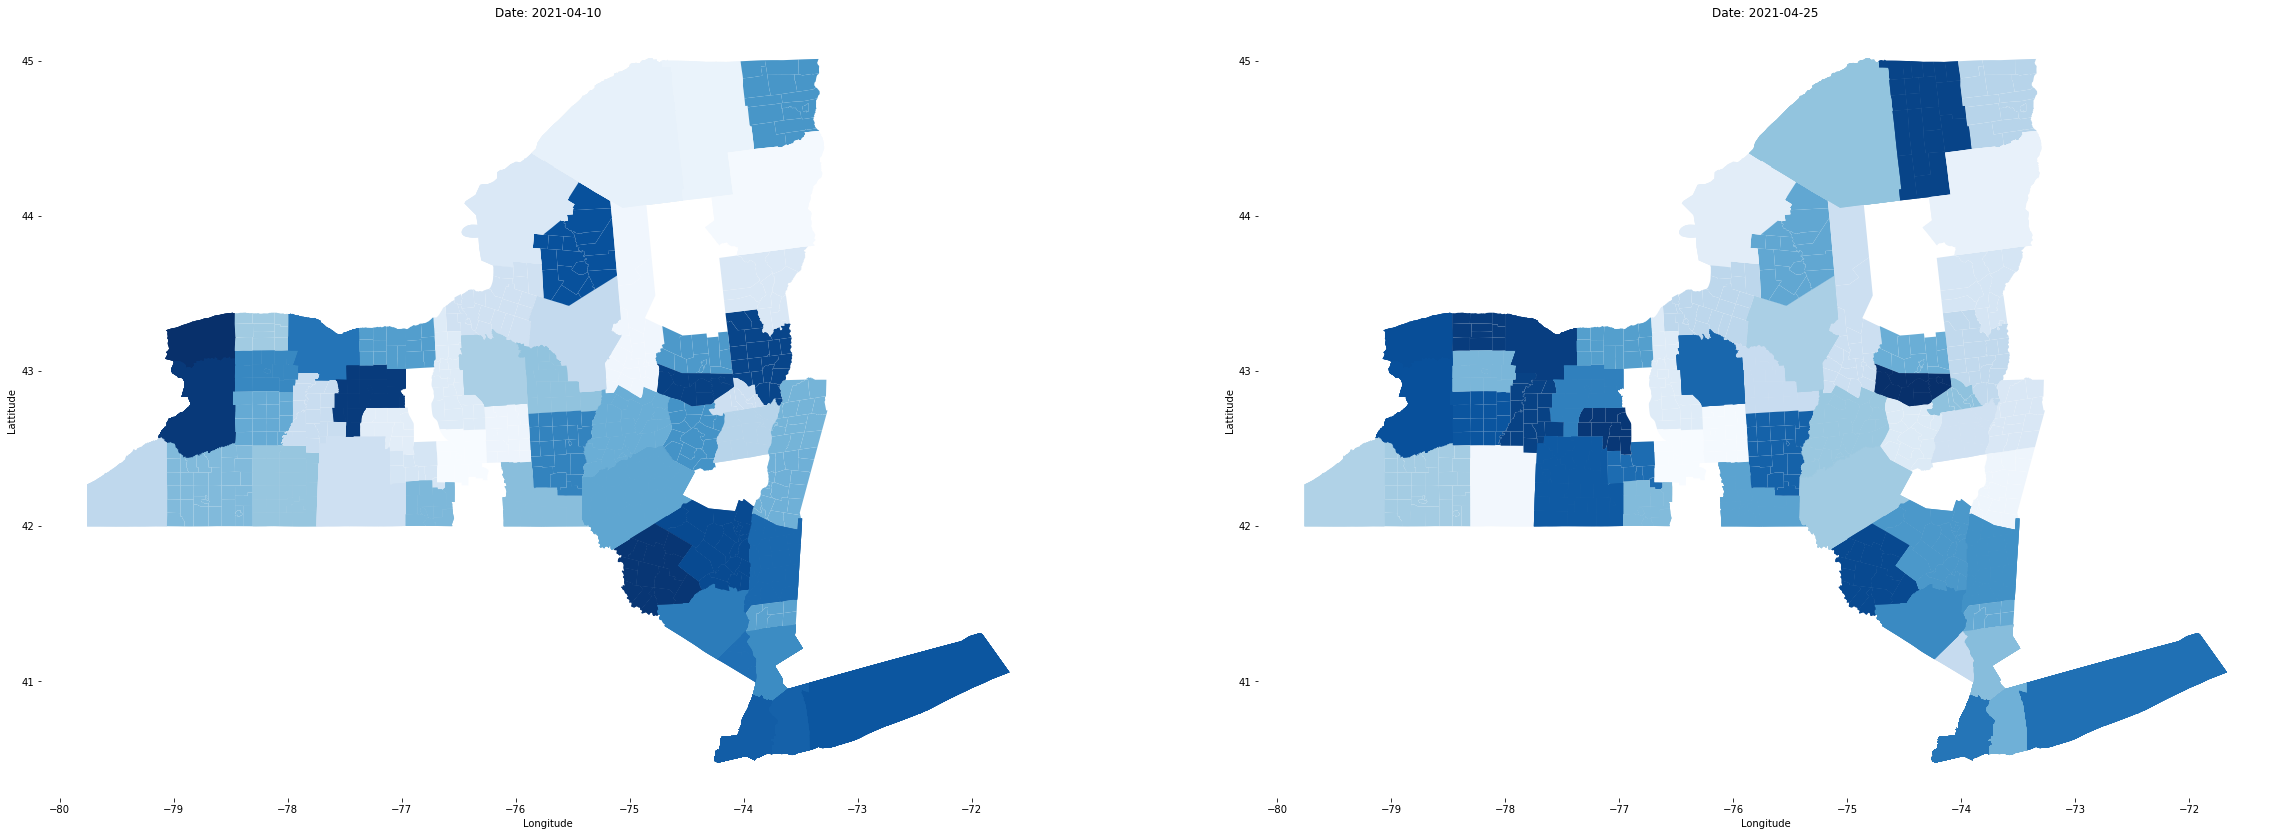

In [22]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-04-10',ax1),('2021-04-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

*COVID-19 initially was concentrated in the most densely populated parts of the New York State, but that
pattern has changed gradually over the past two years.*

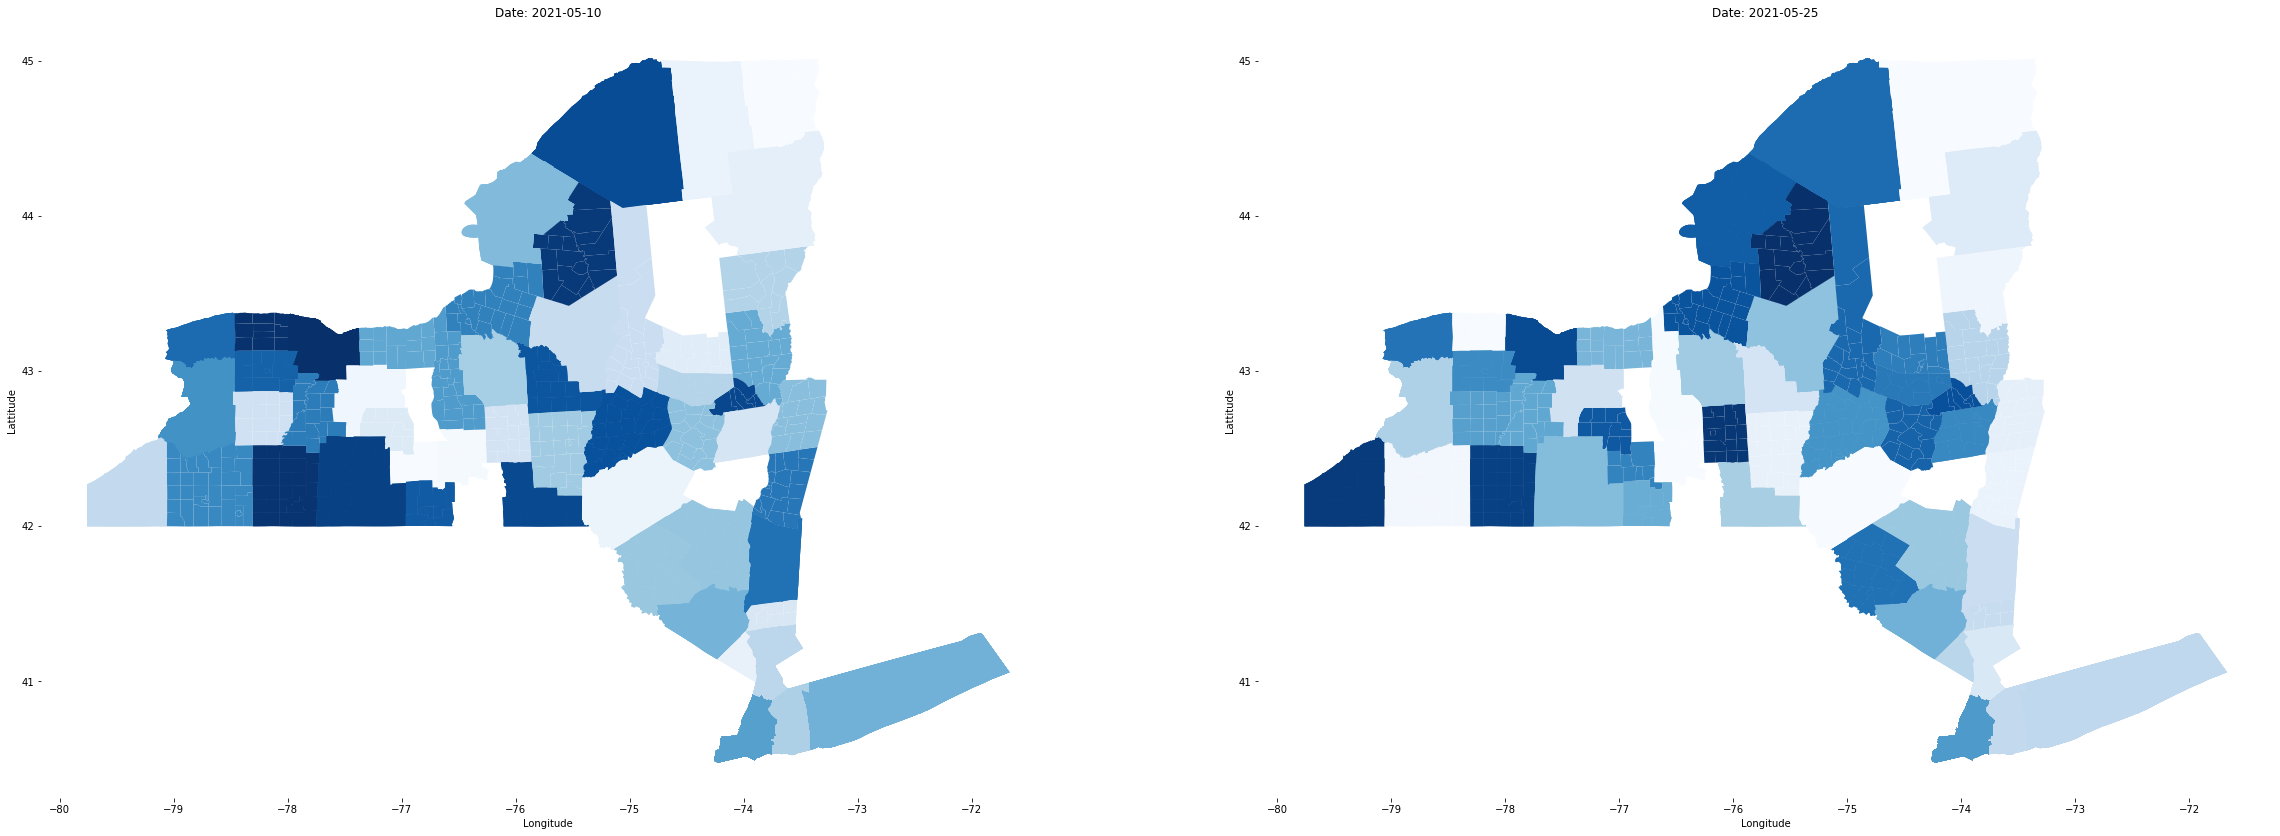

In [23]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-05-10',ax1),('2021-05-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

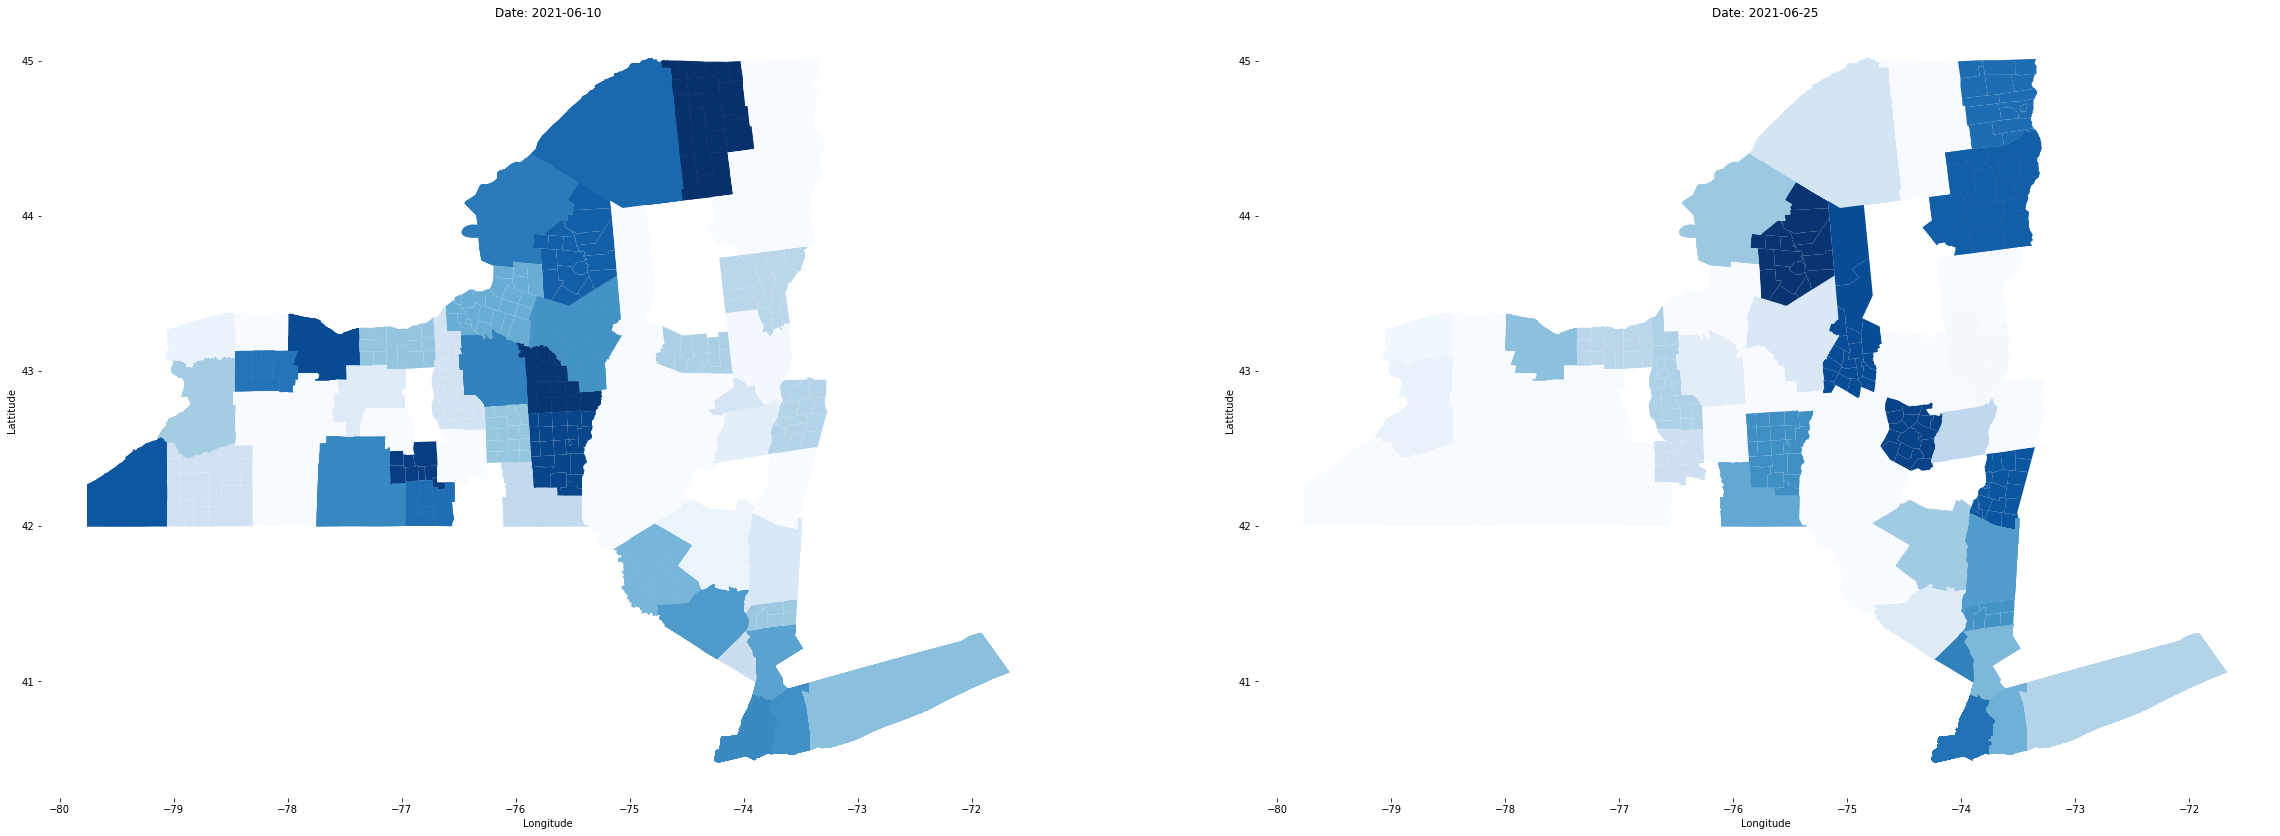

In [24]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-06-10',ax1),('2021-06-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

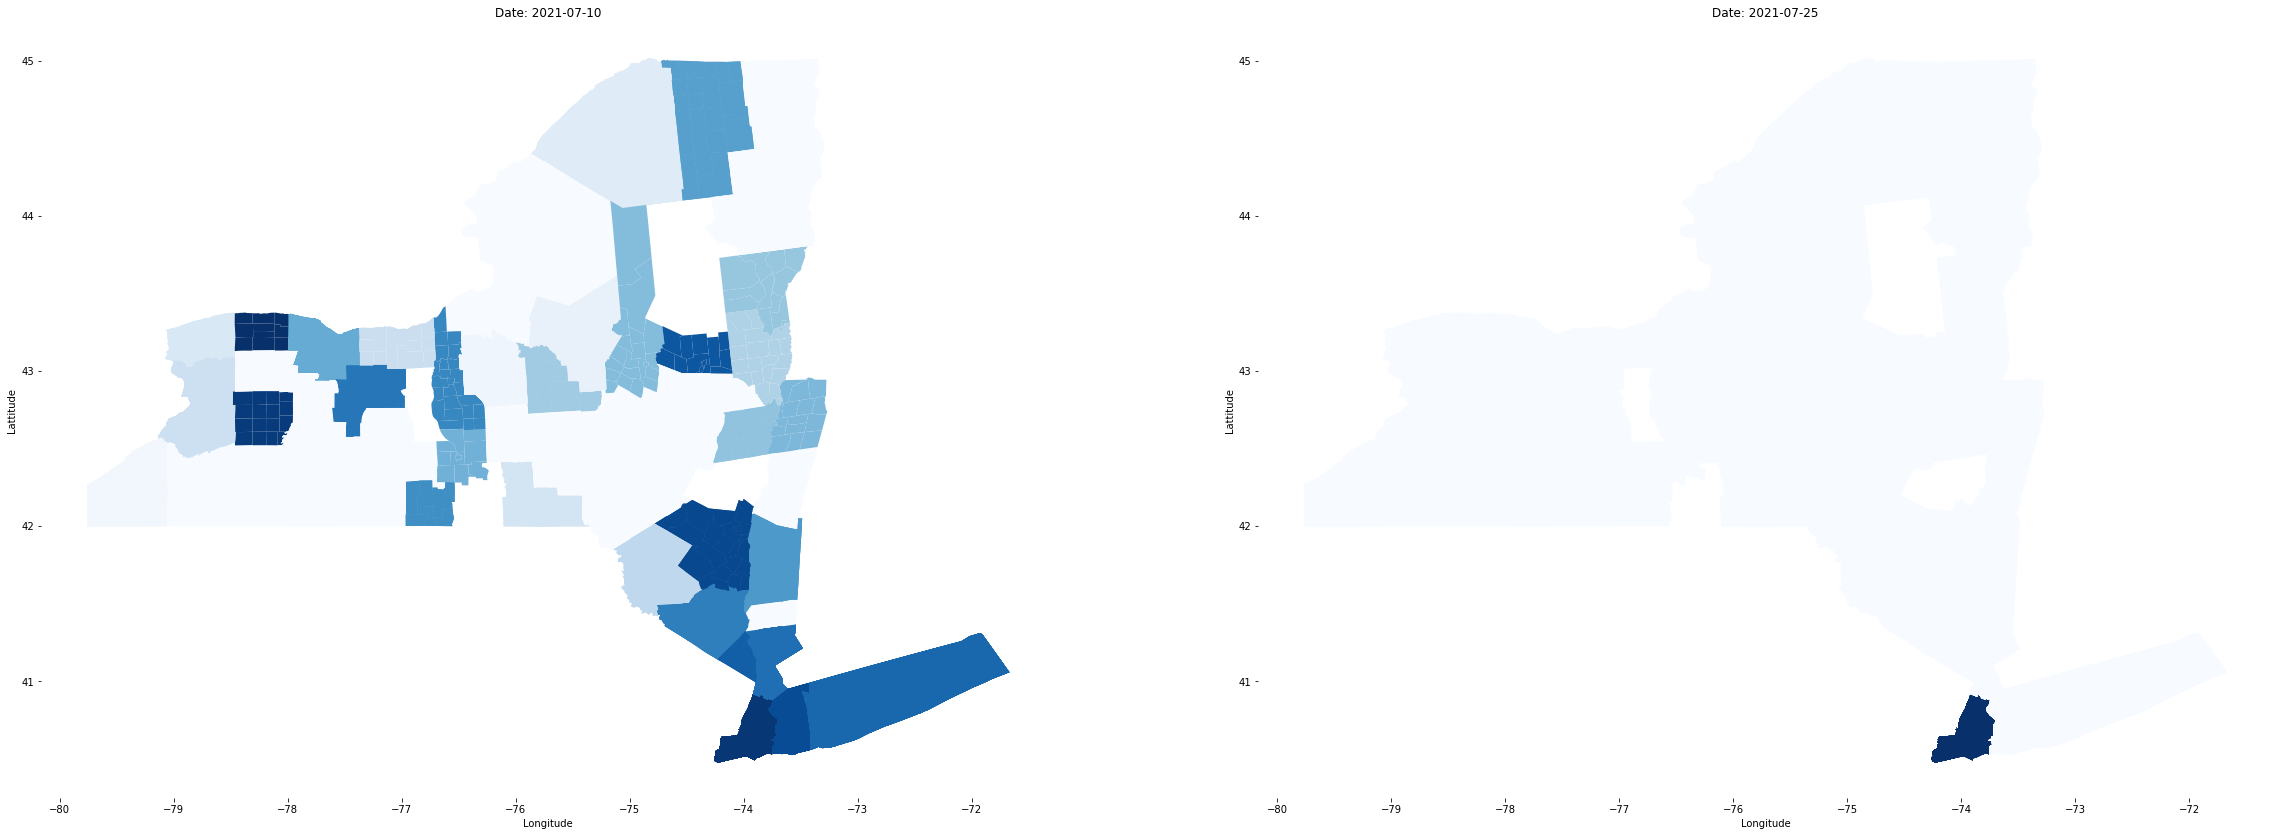

In [25]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-07-10',ax1),('2021-07-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

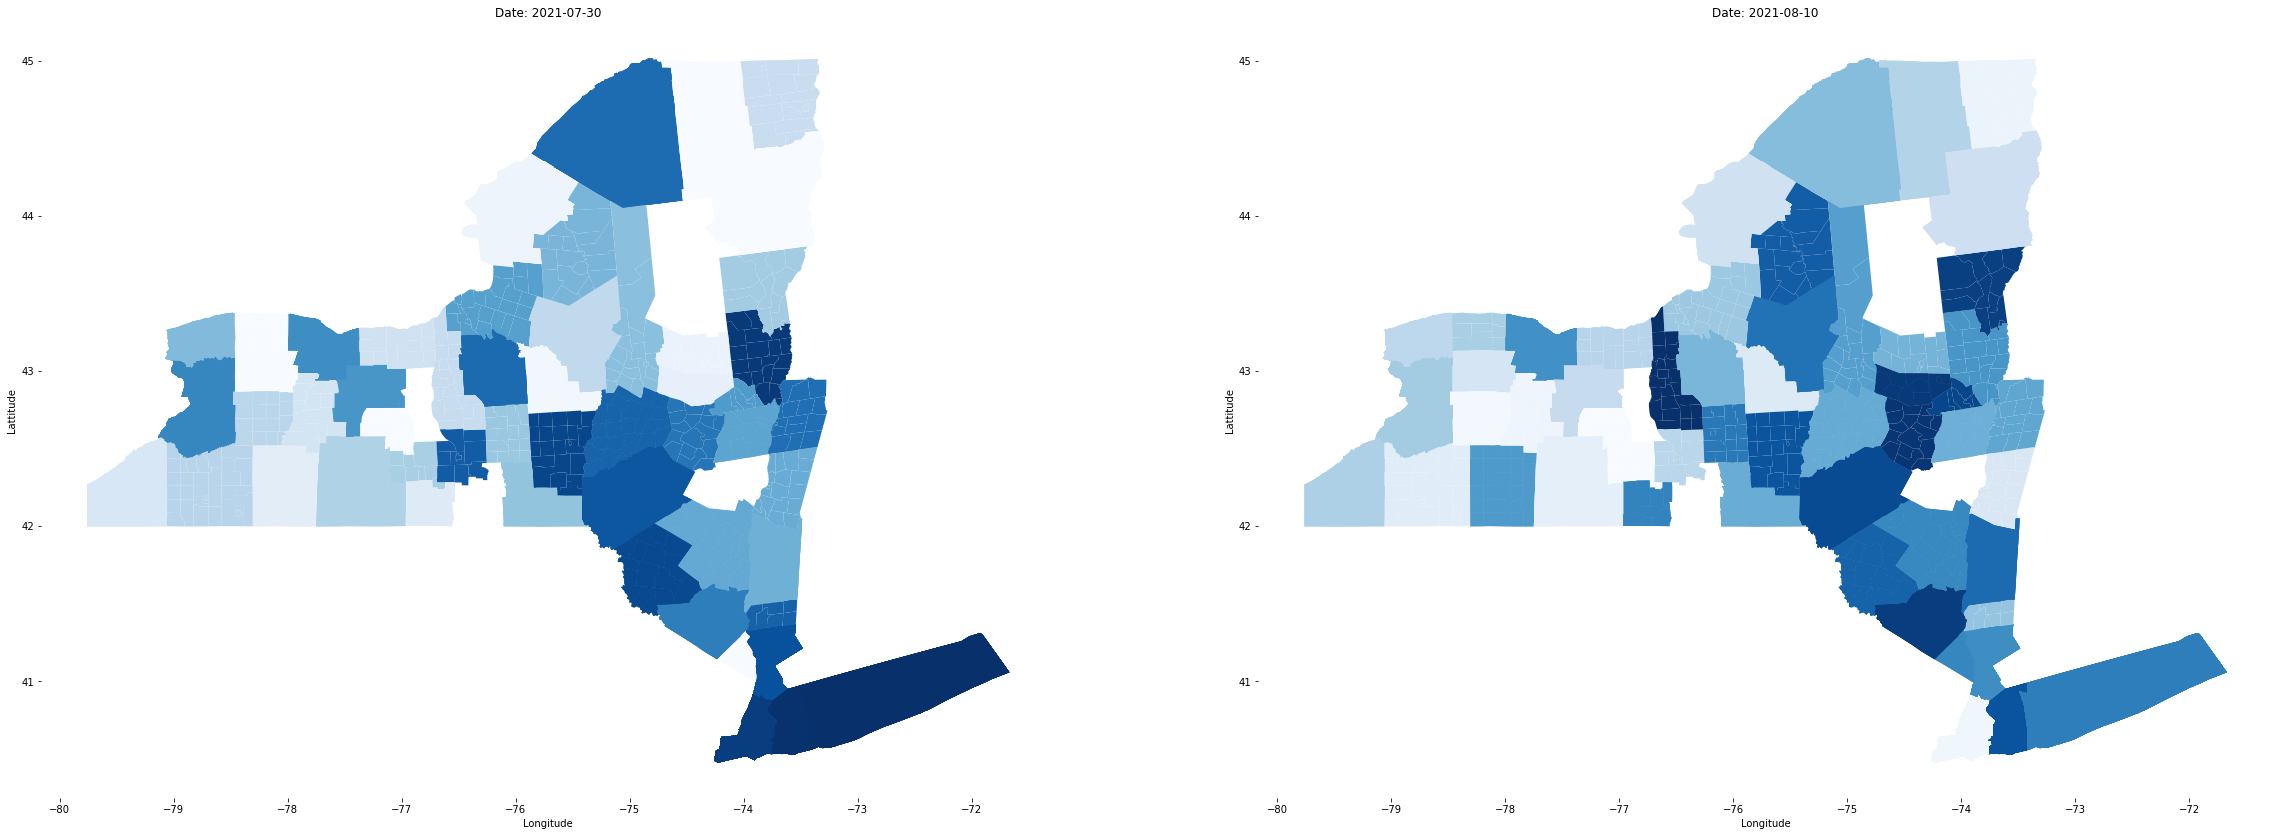

In [26]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-07-30',ax1),('2021-08-10',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

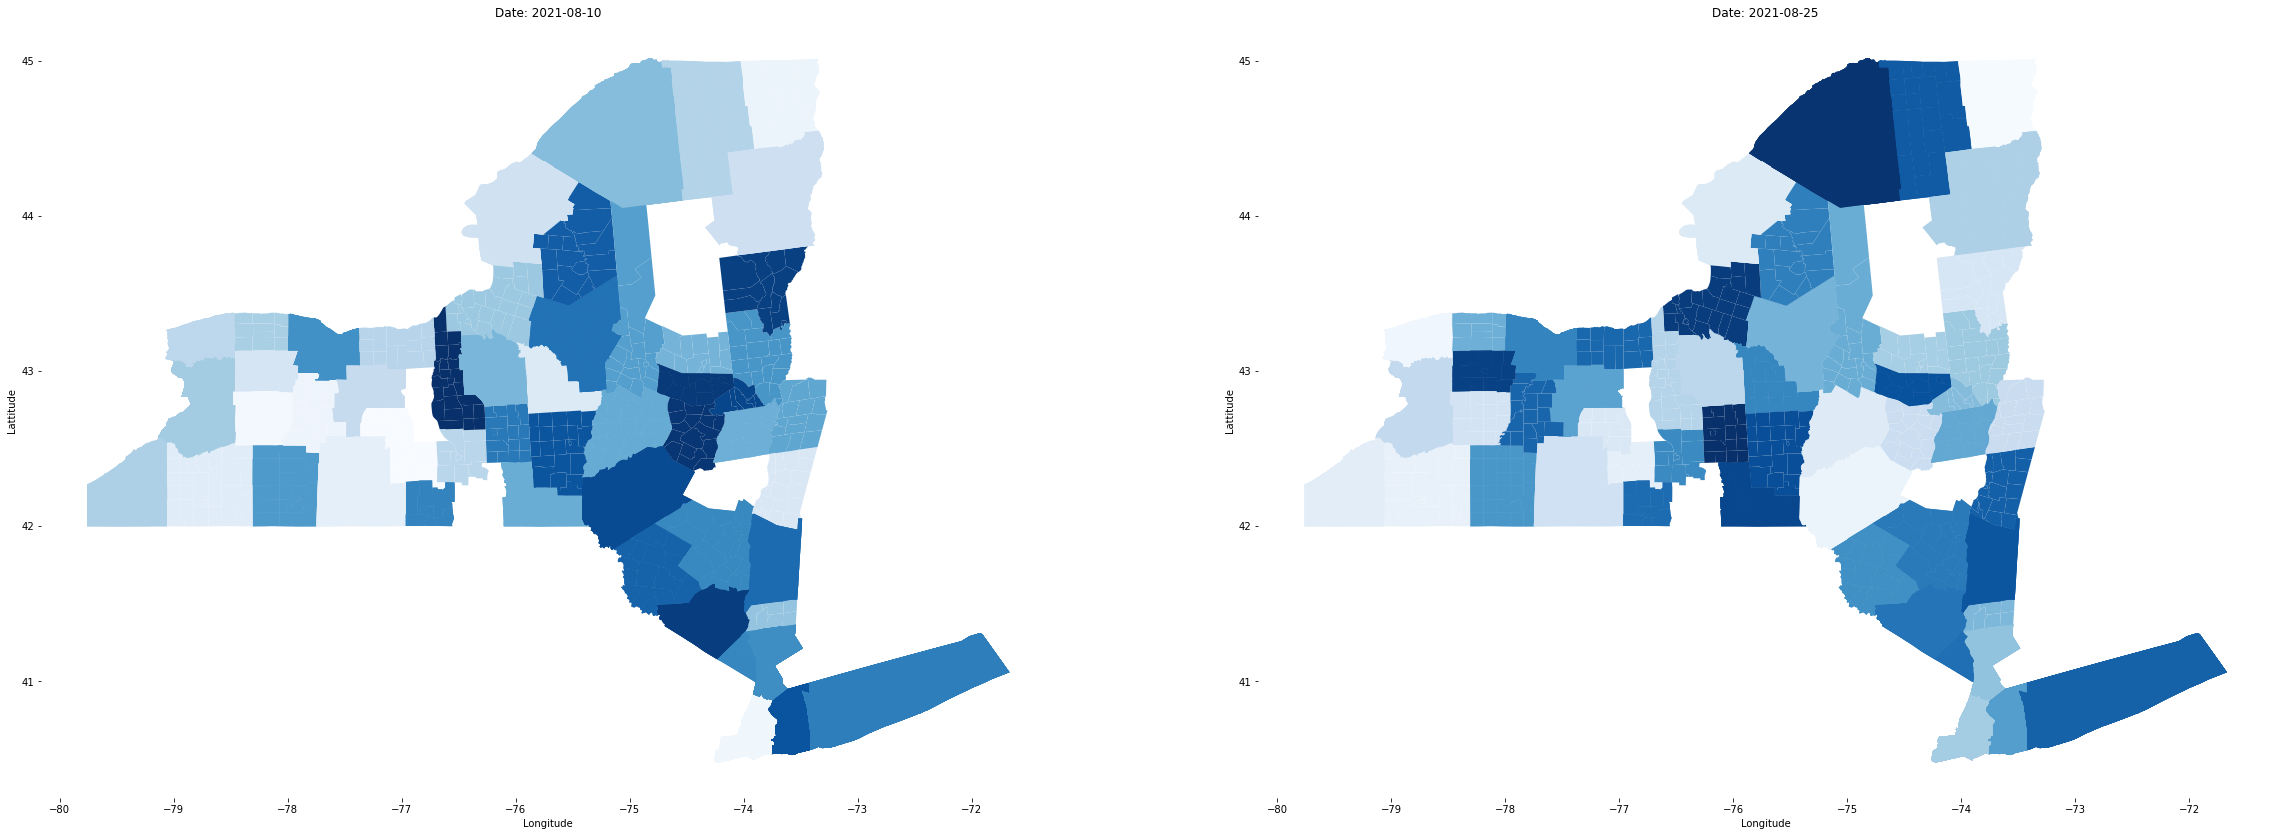

In [27]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-08-10',ax1),('2021-08-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

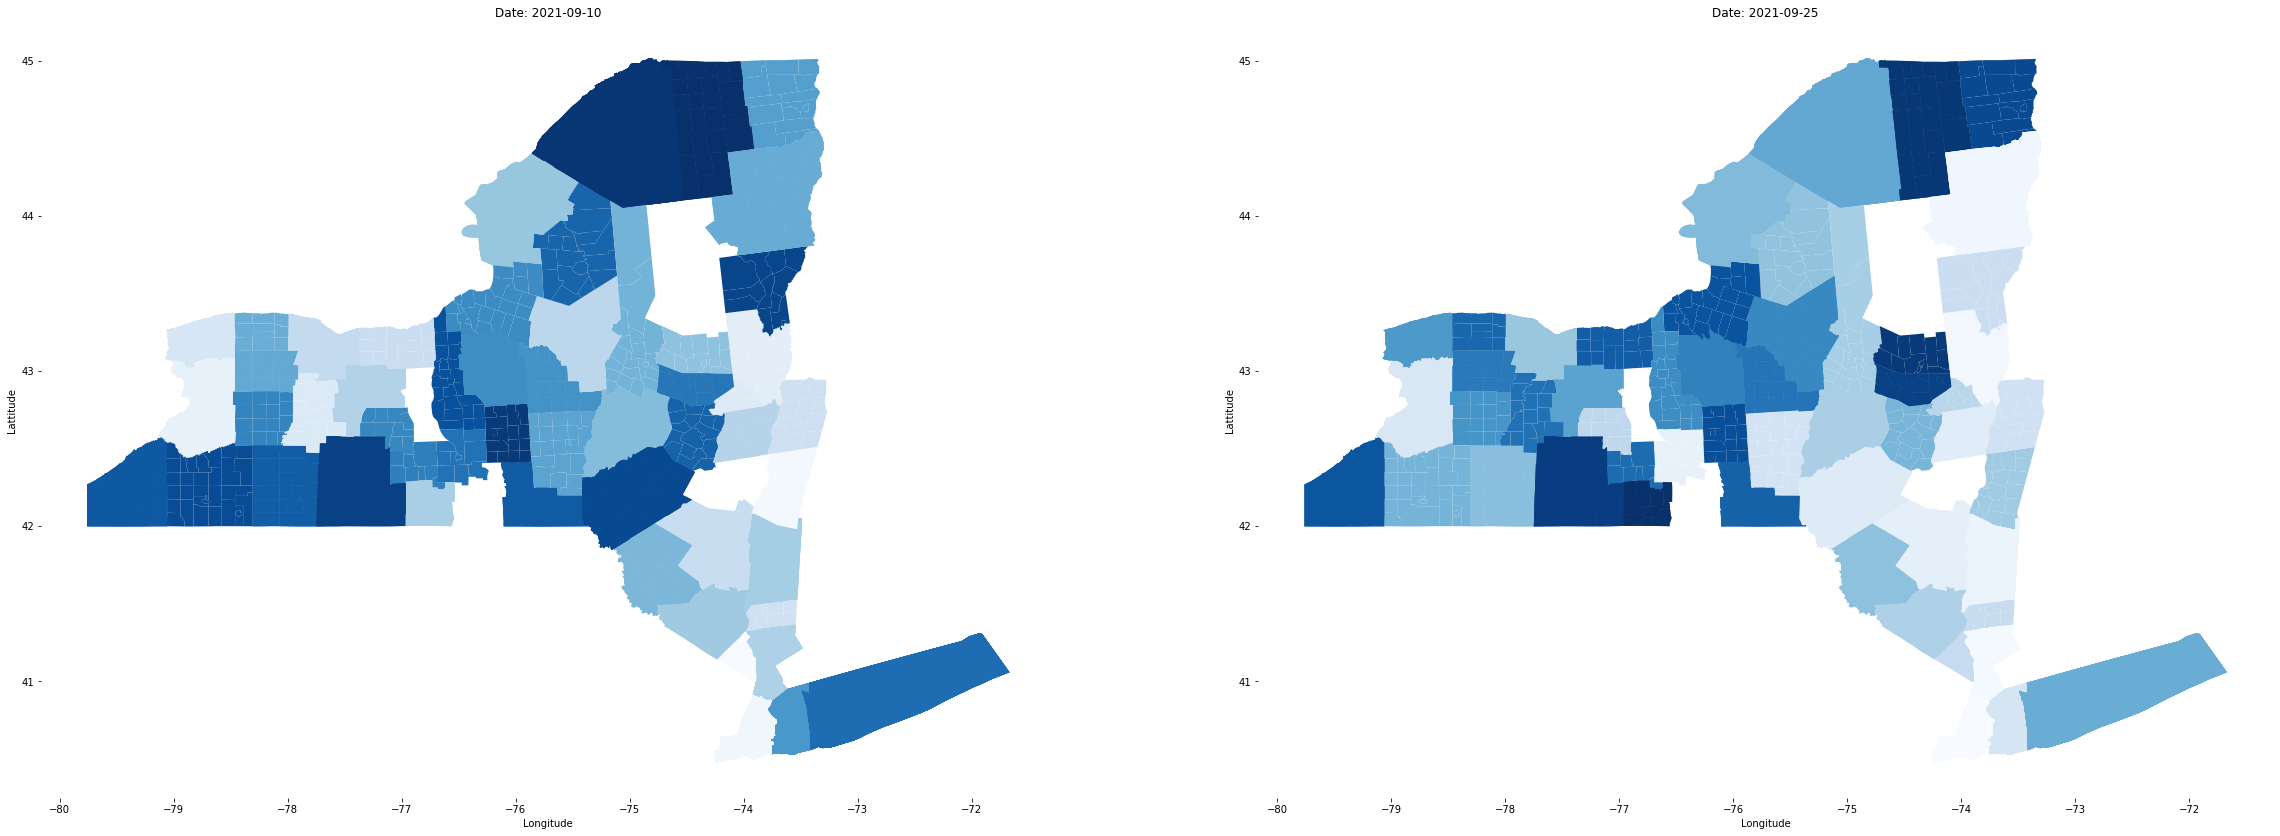

In [28]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-09-10',ax1),('2021-09-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

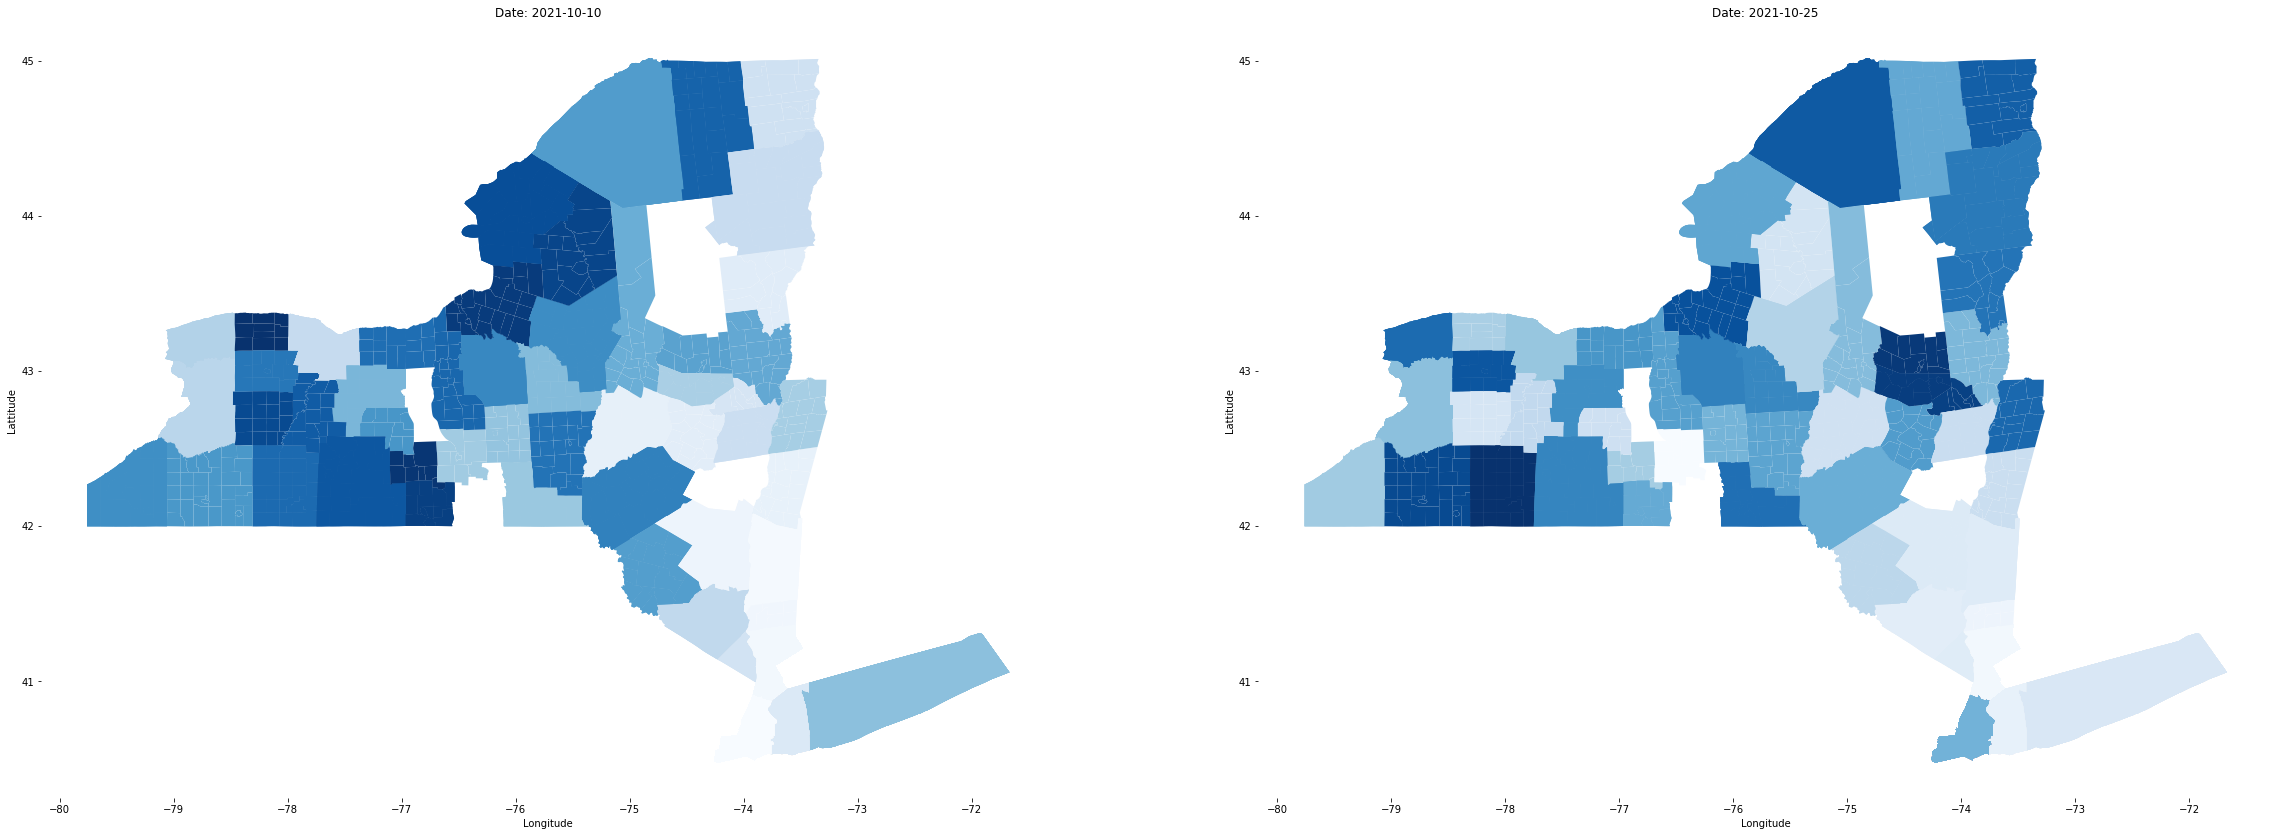

In [29]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-10-10',ax1),('2021-10-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

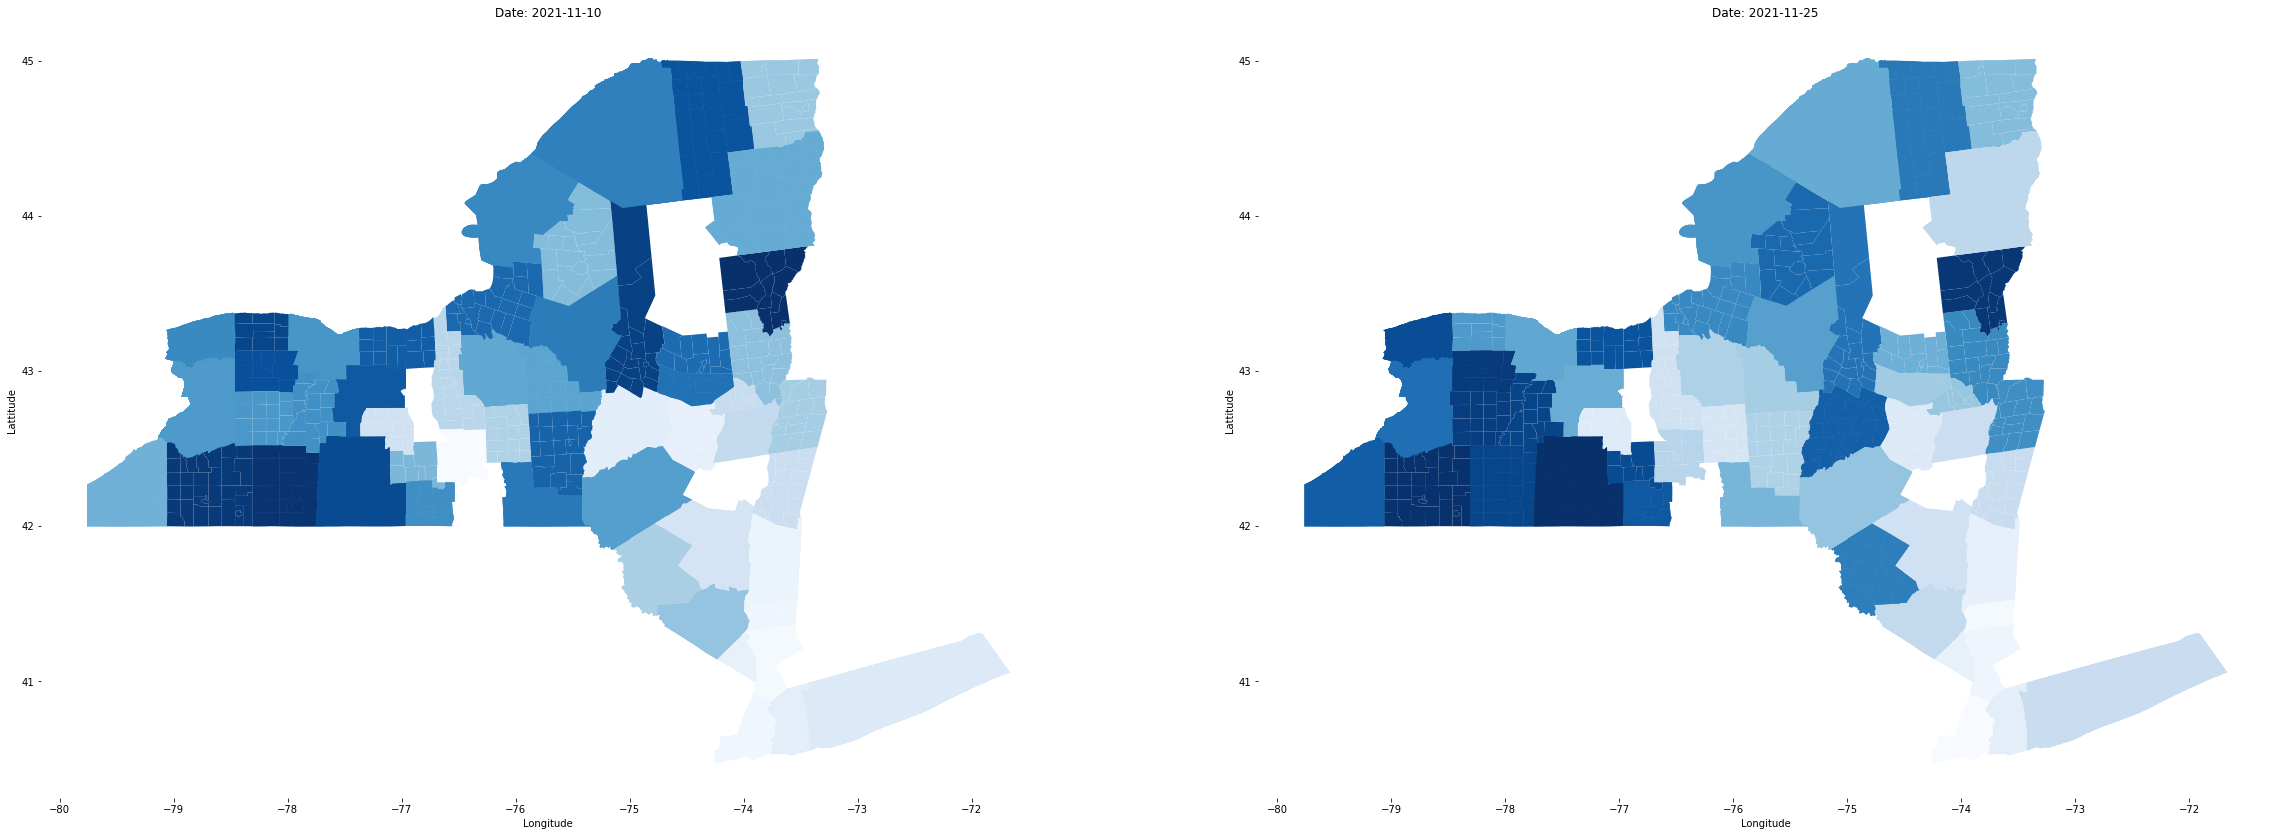

In [30]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-11-10',ax1),('2021-11-25',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

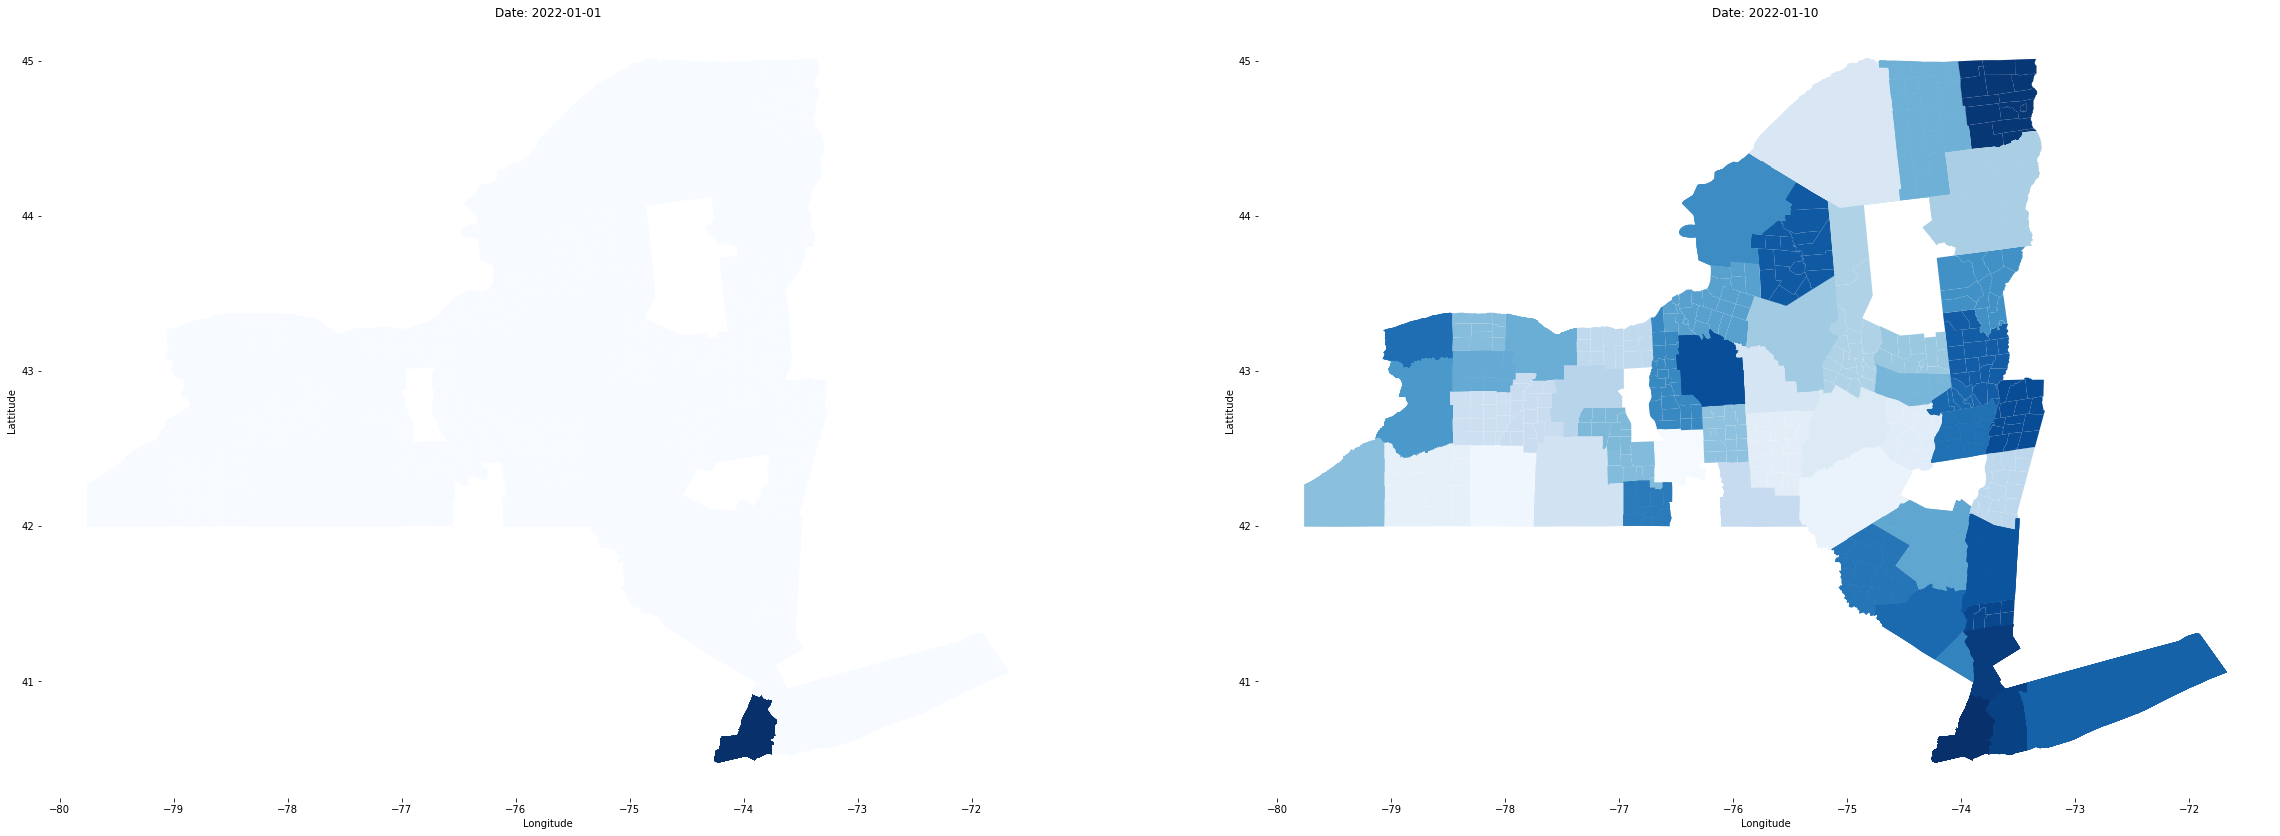

In [31]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-01-01',ax1),('2022-01-10',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

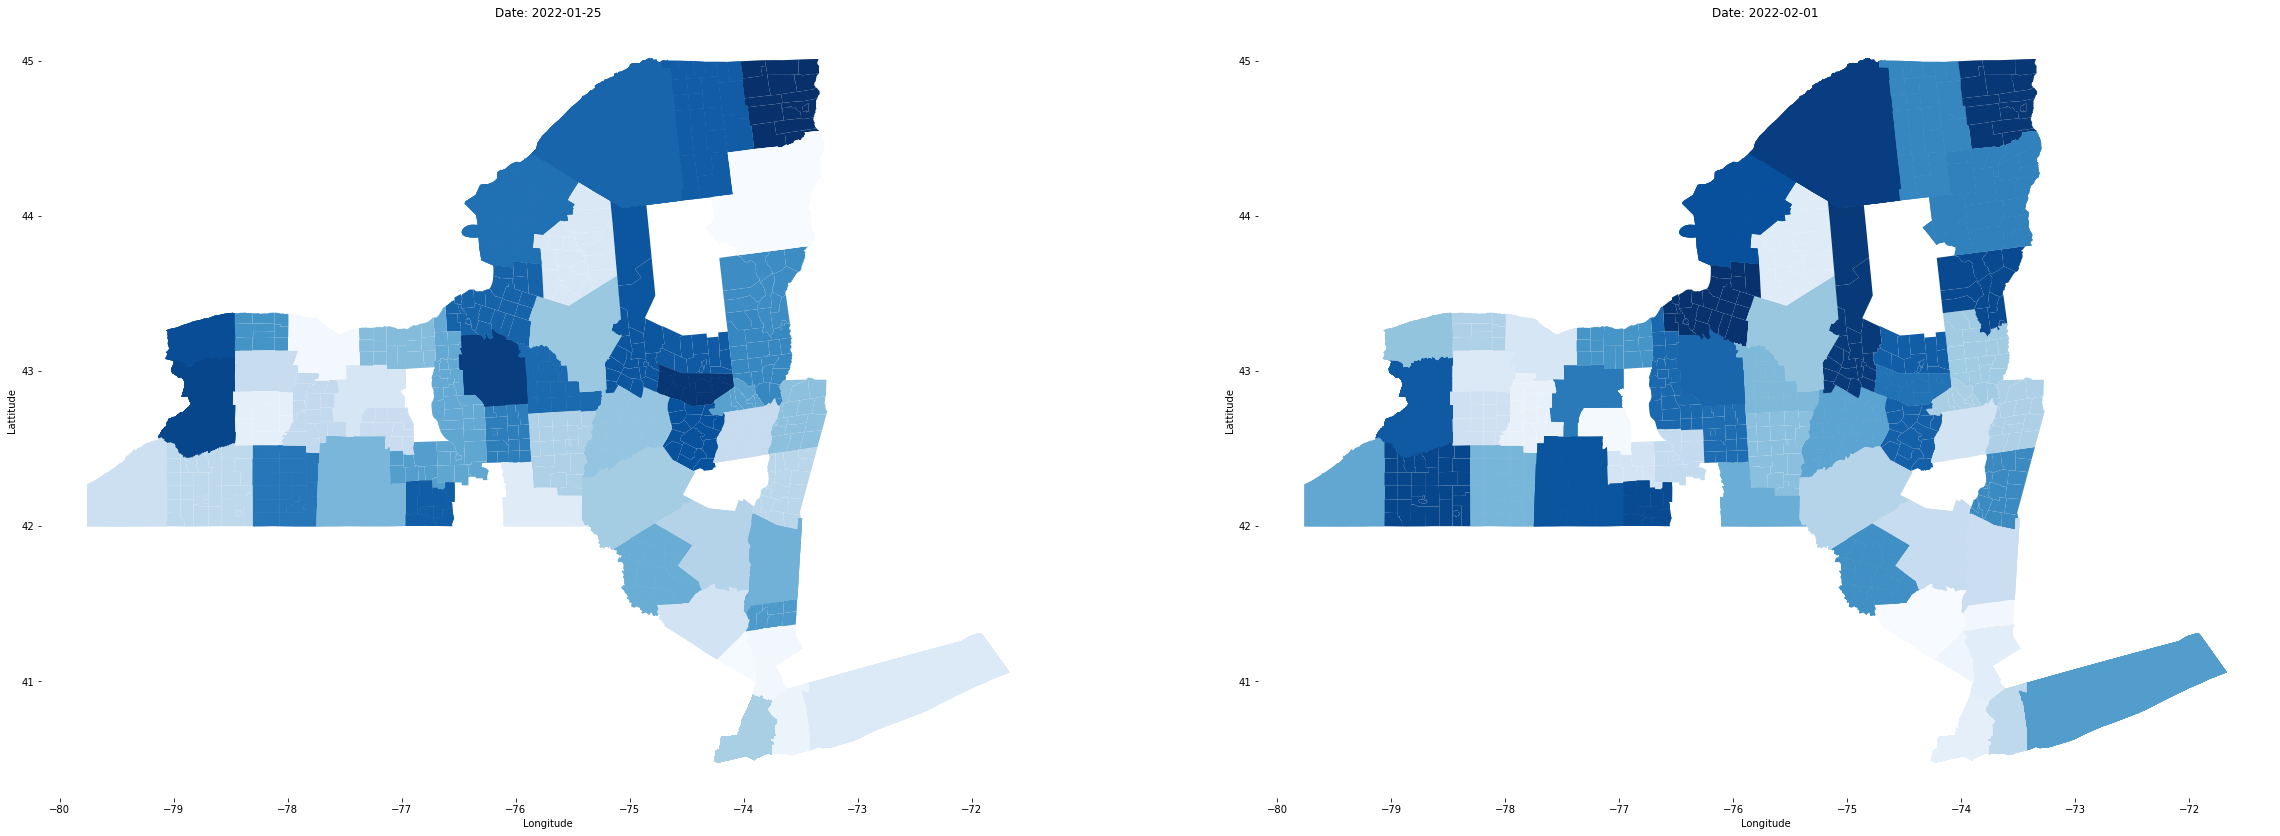

In [32]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-01-25',ax1),('2022-02-01',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')

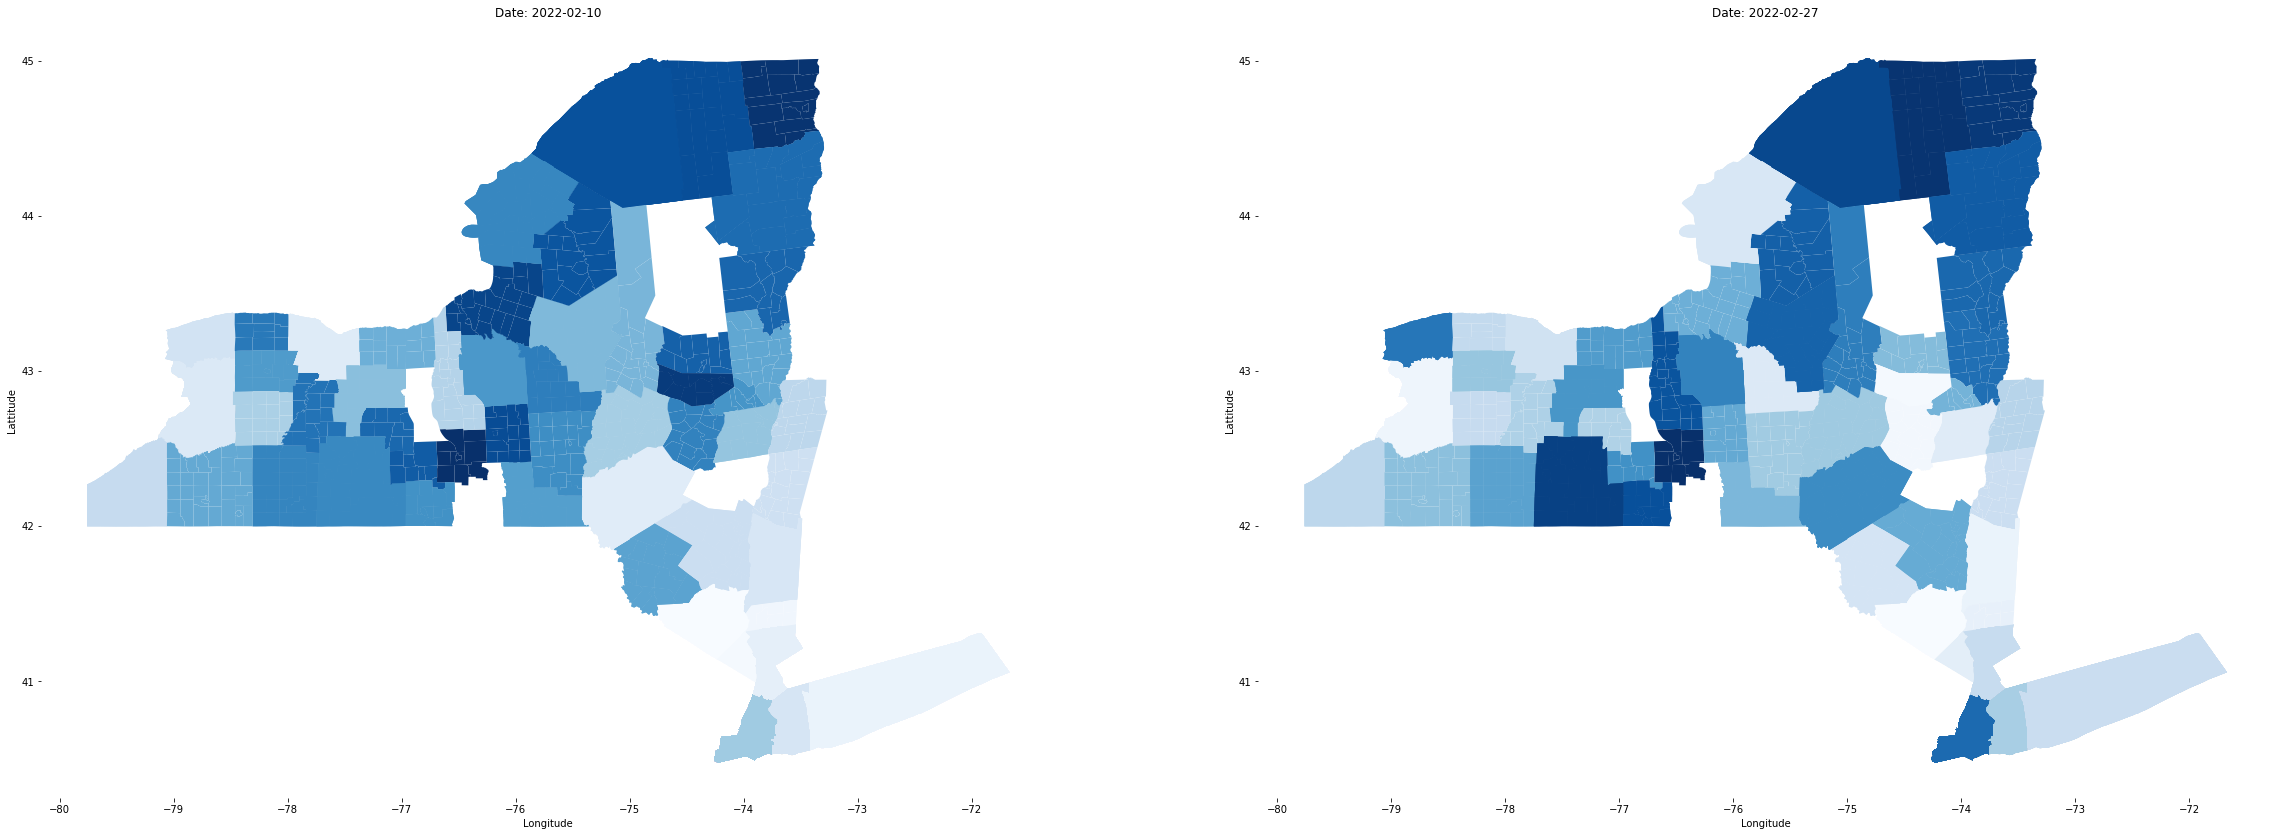

In [33]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-02-10',ax1),('2022-02-27',ax2)]:
    temp =  df[df.date == date]
    temp.drop('POP2020',axis=1,inplace=True)
    temp = street_map.merge(temp, on=['COUNTY'],how='left')
    plot_geo_data(temp, 'daily_cases_by_pop', ax=ax, fig=fig, title="Date: "+date,cmap='Blues')